<a href="https://colab.research.google.com/github/srkpriyanka95/Bike-Sharing-Demand-Prediction-/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Regression analysis in machine learning gives us the relationship between the dependent and the independent variables. Regression analysis provides information such as how the dependent variable changes with the change in the independent variables. 


Regression analysis is a predictive analysis in machine learning, where the algorithms try to understand the relationship between the dependent and independent variables to predict unseen data. The regression model tries to pick the best fit line through the given dependent variables to predict the outcome. The assumptions in the regression analysis are

>>>* The relationship between the independent and dependent variables is linear.
* There is no multicollinearity between the independent variables.
* The errors should follow a normal distribution.
* There should be homoscedasticity of errors or residuals. The variance should be almost the same at every point of the line.

In this project, we are doing a regression analysis of the Seoul bike rental data to predict the count of bikes rented with the help of the dependent variables in the dataset. The data set contains pieces of information such as the rented bike count, hour, season, temperature, humidity, holiday, functioning day, etc., 

The dependent or the target variable for the regression analysis is the rented bike count. We are trying to train our model to learn the patterns inside the data and to predict the outcome accordingly.

The different steps involved in this Regression project are 
>>>* Exploratory Data Analysis
* Feature selection and data preprocessing
* Scaling of variables
* Model implementation
* Linear Regression
* Lasso Regression
* Ridge Regression
* ElasticNet Regression
* Cross Validation and hyperparameters

---



**Exploratory Data Analysis -**
 	In EDA, we will deal with the missing and duplicates in the dataset. We look deeper into the variables and their relationships with each other.

   ---

**Feature Selection and Data preprocessing-**
	Data preprocessing is to look into multicollinearity between the independent variables and drop the unimportant feature. We split the variables using train_test_split to see how the model performs and predict errors for the unseen data. 

---
**Feature Scaling -**
	Feature Scaling is a technique to bring the values into a particular range. Feature scaling helps the gradient descent reach the cost function minima easier than with the unscaled values. There are two types of scalings are
>>>* Normalization - Uses min and max values
   >* Standardization - Uses mean and standard deviation
---
**Model implementation -** In this project, we will implement Linear Regression, lasso regression, Ridge regression, and elastic net Regression. By looking into their model errors, we try to conclude.
	
---
**Cross Validation and hyperparameters**
	In the train test split, train and test data is split on a ratio and pushed into the model, where there is a possibility for inaccurate prediction. So we use cross-validation, where the data is divided into different subsets and tested multiple times.

# **GitHub Link -**



https://github.com/srkpriyanka95/Bike-Sharing-Demand-Prediction-.git



# **Problem Statement**


Nowadays, rental bikes are introduced in many urban cities to enhance mobility comfort and for an easier commute. Availability and accessibility of bikes should be easier for the public, and the waiting time should be less. The crucial part is to analyze the demand and provide the bikes as per the need. To make the process smooth and hassle-free, we should predict the bike demands for different hours of the day. By implementing machine-learning models to the Seoul bike rental data set, we try to predict the bike demands at various hours of the day.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import *
import warnings 
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
BikeShare_data=pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project/Bike sharing demand prediction/SeoulBikeData.csv',encoding='unicode escape')

### Dataset First View

In [4]:
# Dataset First Look
BikeShare_data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
BikeShare_data.shape

(8760, 14)

### Dataset Information

In [6]:
# Dataset Info
BikeShare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
BikeShare_data.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
BikeShare_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

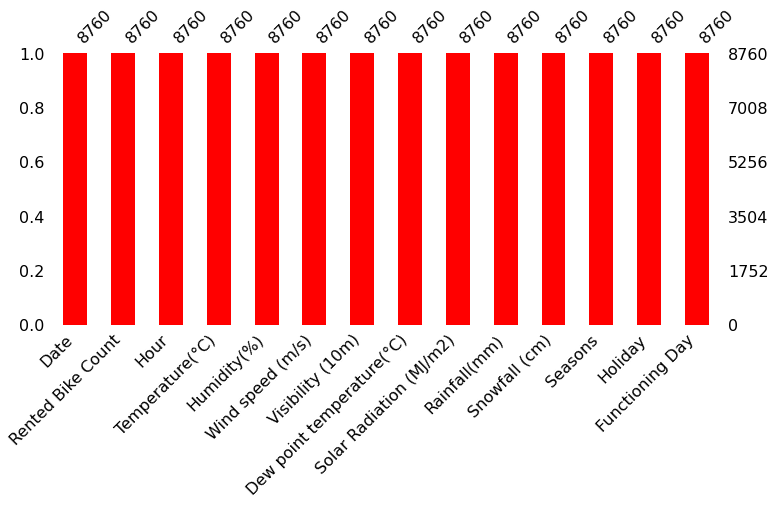

In [9]:
# Visualizing the missing values
msno.bar(BikeShare_data,figsize=(12,5),color='Red')

### What did you know about your dataset?

*   There are 8760 observations and 14 features in the dataset

*   There are no duplicates found.
*   There are no missing values in the dataset.
*   The dataset contains three different datatypes, namely 
      



>>>>>
*   object 
*   int 
*    float
















## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
BikeShare_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Renamming columns
BikeShare_data.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity', 'Wind speed (m/s)':'wind_speed','Visibility (10m)':'visibility','Dew point temperature(°C)':'dew_point_temperature','Solar Radiation (MJ/m2)':'solar_radiation','Rainfall(mm)':'rainfall','Snowfall (cm)':'snowfall','Functioning Day':'functioning_day'},inplace=True)
BikeShare_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation',
       'rainfall', 'snowfall', 'Seasons', 'Holiday', 'functioning_day'],
      dtype='object')

In [12]:
# Dataset Describe
BikeShare_data.describe().T

count         mean         std   min     25%      50%  \
Rented Bike Count      8760.0   704.602055  644.997468   0.0  191.00   504.50   
Hour                   8760.0    11.500000    6.922582   0.0    5.75    11.50   
Temperature            8760.0    12.882922   11.944825 -17.8    3.50    13.70   
Humidity               8760.0    58.226256   20.362413   0.0   42.00    57.00   
wind_speed             8760.0     1.724909    1.036300   0.0    0.90     1.50   
visibility             8760.0  1436.825799  608.298712  27.0  940.00  1698.00   
dew_point_temperature  8760.0     4.073813   13.060369 -30.6   -4.70     5.10   
solar_radiation        8760.0     0.569111    0.868746   0.0    0.00     0.01   
rainfall               8760.0     0.148687    1.128193   0.0    0.00     0.00   
snowfall               8760.0     0.075068    0.436746   0.0    0.00     0.00   

                           75%      max  
Rented Bike Count      1065.25  3556.00  
Hour                     17.25    23.00  
Temperature              22.50    39.40  
Humidity                 74.00    98.00  
wind_speed                2.30     7.40  
visibility             2000.00  2000.00  
dew_point_temperature    14.80    27.20  
solar_radiation           0.93     3.52  
rainfall                  0.00    35.00  
snowfall                  0.00     8.80

### Variables Description 



*   **Date** - Date
*   **Rented Bike Count** - Number of Bikes Rented
*   **Hour** - Hour of the day
*  **Temperature(°C)** - Temperature of the day
* **Humidity(%)** - Humidity percentage
* **Wind speed (m/s)** - wind speed 
* **Visibility (10m)** - Visibility measure for 10 m
* **Dew point temperature(°C)** - Dew point temperature
* **Solar Radiation (MJ/m2)** - Solar radiation fot the day
* **Rainfall(mm)** - Rainfall in mm
* **Snowfall (cm)** - Snowfall in cm
* **Seasons** - Season of the year
* **Holiday** - Is it a holiday or not
* **Functioning Day** - Is it a functioning day or not







### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.

for i in BikeShare_data.columns:
    print('\n The number of unique values in' , i ,' : ', BikeShare_data[i].nunique())



 The number of unique values in Date  :  365

 The number of unique values in Rented Bike Count  :  2166

 The number of unique values in Hour  :  24

 The number of unique values in Temperature  :  546

 The number of unique values in Humidity  :  90

 The number of unique values in wind_speed  :  65

 The number of unique values in visibility  :  1789

 The number of unique values in dew_point_temperature  :  556

 The number of unique values in solar_radiation  :  345

 The number of unique values in rainfall  :  61

 The number of unique values in snowfall  :  51

 The number of unique values in Seasons  :  4

 The number of unique values in Holiday  :  2

 The number of unique values in functioning_day  :  2


In [14]:
# unique values in categorical variables

categorical_variables = list(set(BikeShare_data.columns)-set(BikeShare_data.describe().columns))
print(f'Categorical Variables are {categorical_variables}')
for i in categorical_variables:
  print(f'\n Unique values in {i} are {BikeShare_data[i].unique()}' )


Categorical Variables are ['functioning_day', 'Holiday', 'Date', 'Seasons']

 Unique values in functioning_day are ['Yes' 'No']

 Unique values in Holiday are ['No Holiday' 'Holiday']

 Unique values in Date are ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/20

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Converting the date column into date time datatype
BikeShare_data['Date']=pd.to_datetime(BikeShare_data['Date'],format='%d/%m/%Y')
# Seperating the month, year and day column for futher analysis
BikeShare_data['month']=BikeShare_data['Date'].dt.month
BikeShare_data['year']=BikeShare_data['Date'].dt.year
BikeShare_data['day']=BikeShare_data['Date'].dt.day_name()
# Creating Weekend column using day name column
BikeShare_data['weekend']=BikeShare_data['day'].apply(lambda  x: 'yes' if (x== 'Saturday' or x== 'Sunday') else 'no')

In [16]:
BikeShare_data.head()

Date  Rented Bike Count  Hour  Temperature  Humidity  wind_speed  \
0 2017-12-01                254     0         -5.2        37         2.2   
1 2017-12-01                204     1         -5.5        38         0.8   
2 2017-12-01                173     2         -6.0        39         1.0   
3 2017-12-01                107     3         -6.2        40         0.9   
4 2017-12-01                 78     4         -6.0        36         2.3   

   visibility  dew_point_temperature  solar_radiation  rainfall  snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday functioning_day  month  year     day weekend  
0  Winter  No Holiday             Yes     12  2017  Friday      no  
1  Winter  No Holiday             Yes     12  2017  Friday      no  
2  Winter  No Holiday             Yes     12  2017  Friday      no  
3  Winter  No Holiday             Yes     12  2017  Friday      no  
4  Winter  No Holiday             Yes     12  2017  Friday      no

In [17]:
# Converting the Date, Month and Year columns into object datatype, as they are categorical variables
BikeShare_data['month']=BikeShare_data['month'].astype('object')
BikeShare_data['year']=BikeShare_data['year'].astype('object')
BikeShare_data['Hour']=BikeShare_data['Hour'].astype('object')
# Checking whether the datatypes are changed are not
BikeShare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   object        
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   wind_speed             8760 non-null   float64       
 6   visibility             8760 non-null   int64         
 7   dew_point_temperature  8760 non-null   float64       
 8   solar_radiation        8760 non-null   float64       
 9   rainfall               8760 non-null   float64       
 10  snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  fun

In [18]:
# Knowing the start and end date of data
print(f"Data starts from {BikeShare_data.Date.min().strftime('%d-%m-%Y')} to {BikeShare_data.Date.max().strftime('%d-%m-%Y')}")

Data starts from 01-12-2017 to 30-11-2018


### What all manipulations have you done and insights you found?


*   The data set does not have any null or duplicate values.
*   The date column was initially an object data type column. For further analysis, I converted it into a DateTime data type column.
* From the date column, I created columns such as day, month, and year for further analysis.
* From the day column, I created a separate column for the weekend. If weekend 'Yes' else 'No'.
* As all these columns are categorical, the data types of the columns day, month, and year are changed to object data type. 



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1  Univariate analysis of categorical Varibles**

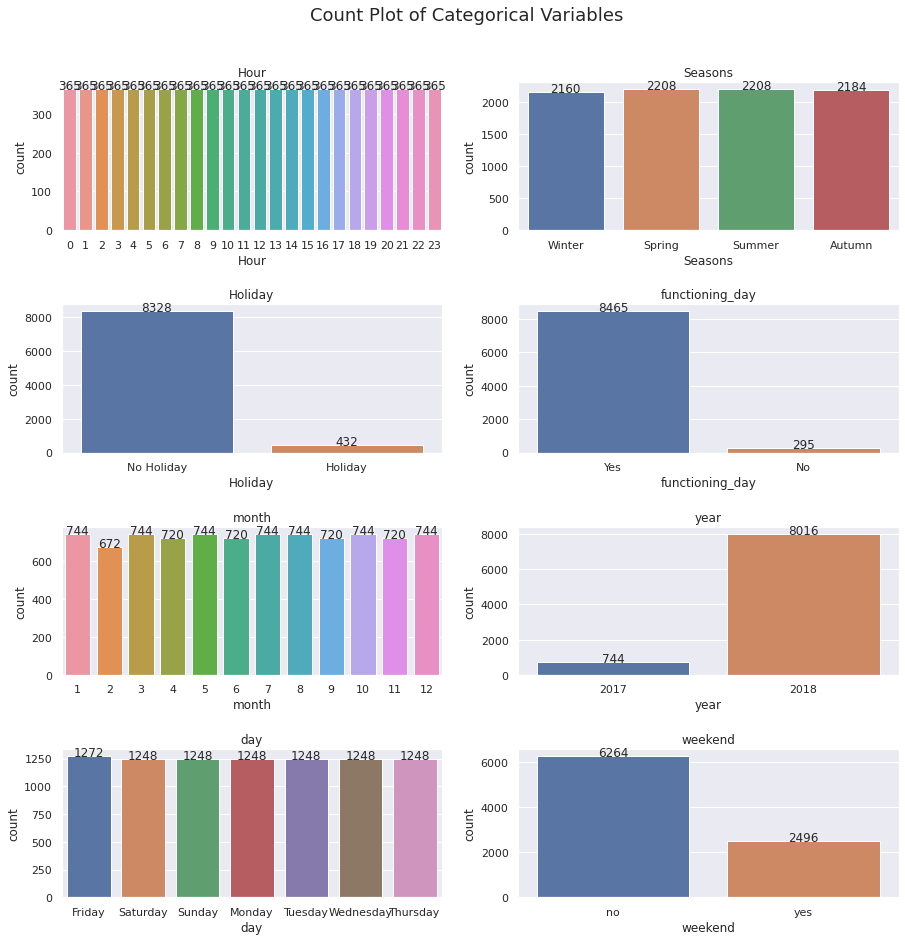

In [19]:
# Chart - 1 visualizating the count of bikes rented over different hours of the day
sns.set(rc={"figure.figsize":(10, 5)})
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Count Plot of Categorical Variables", fontsize=18, y=0.95)
count=1
for i in BikeShare_data.select_dtypes('object'):
  plt.subplot(4,2,count)
  uni=sns.countplot(BikeShare_data[i])
  for n in uni.patches:
    uni.annotate(n.get_height(),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=12)
  uni.set_title(i ,fontsize=12)
  count+=1
plt.show()


##### 1. Why did you pick the specific chart?

The Seaborn count plot gives us the observations count spread over categorical variables with the help of bars. We can easily interpret observations within a particular category. 

##### 2. What is/are the insight(s) found from the chart?

* Each hour in a day holds an observation.
* 2017 has 748 observations
* 2018 has 8016 observations
* We already know that the dataset contains information from 01/12/2017 through 30/11/2018
* There are 2496 entries for weekends, and 6264 entries are for weekdays entries.
* There are 432 observations as holidays and 8326 entries as no holidays.
* There are 295 non-functioning days and 8465 functioning days.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* We have observations for each hour of the day, which help us to predict the demand based on the hour.
* The observations for the non-functioning day seem to have entries in the dataset. If the day is a non-functioning day, then the number of rentals will be zero. Hence the observations with non-functioning data can be dropped.
* We have entries for weekends and weekdays. With the data, we can predict if there is any demand change between these two categories.
* Whether Holiday or No holiday affects the demand.

#### **Chart - 2  Distribution plot for Numerical Variables**

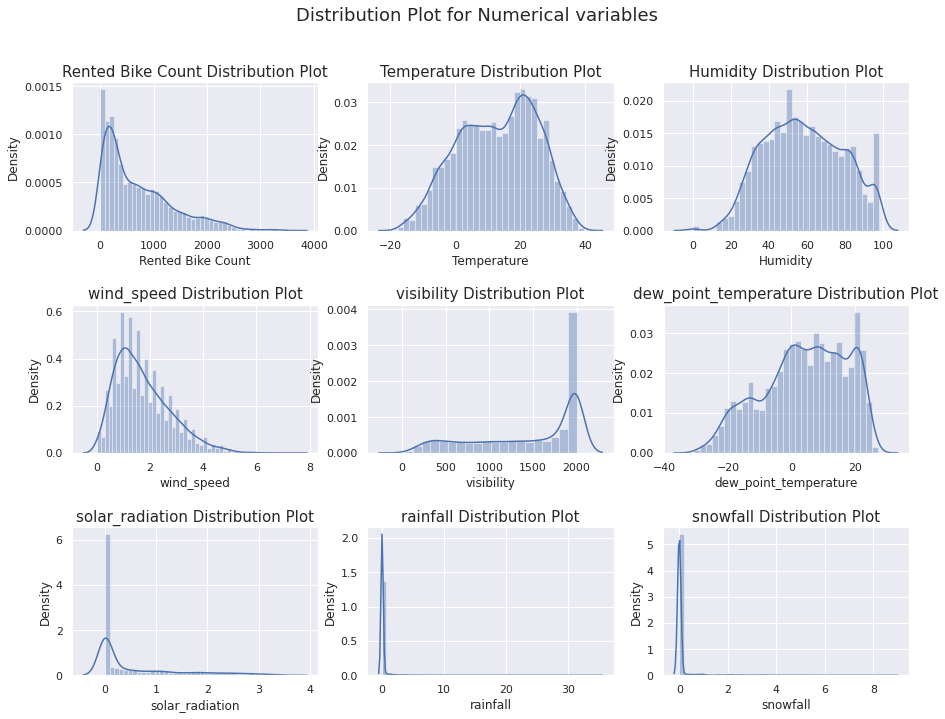

In [20]:
# Chart - 7 Distribution of different variables in the dataframe
sns.set(rc={"figure.figsize":(6, 6)})
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Distribution Plot for Numerical variables", fontsize=18, y=0.95)
count=1
for i in BikeShare_data.describe().columns:
  plt.subplot(4,3,count)
  dist=sns.distplot(BikeShare_data[i])
  dist.set_title(i+' Distribution Plot',fontsize=15)
  count+=1
plt.show()

##### 1. Why did you pick the specific chart?

Distplot depicts the variation in the distribution of the continuous data. A distribution plot helps to determine whether the variable has any skewness or kurtosis associated with it. 

##### 2. What is/are the insight(s) found from the chart?

* Rented Bike Count - Positively Skewed
* Temperature - Negatively Skewed
* Humidity - Platykurtic
* Wind_speed - Positively Skewed
* Visibility - Negatively Skewed
* Dew_point_temperature - Negatively Skewed and platykurtic
* Solar_radiation - Positively Skewed and leptokurtic
* Rainfall - Positively Skewed and leptokurtic
* Snowfall - Positively Skewed and leptokurtic

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In Linear Regression, we assume that the dependent variable follows a normal distribution. In this case, the Rented Bike Count is our dependent variable and has a positively skewed distribution. We have to do a transformation to make it a normally distributed variable.

#### **Chart - 3  Count of bikes rented over different hours of the day**

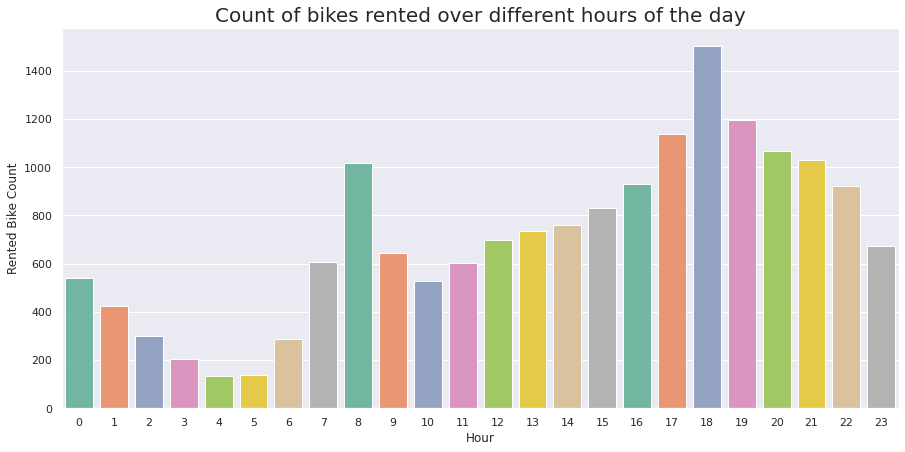

In [21]:
# Chart - 1 visualizating the count of bikes rented over different hours of the day
sns.set(rc={"figure.figsize":(15, 7)})
rented_vs_hour=sns.barplot(data=BikeShare_data,x='Hour',y='Rented Bike Count',palette='Set2',ci=None)
rented_vs_hour.set_title('Count of bikes rented over different hours of the day',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart provides a clear visual representation of categorical variables for the data with their summary static. A bar chart with hue helps with the effortless comparison between different variables in a single go.

##### 2. What is/are the insight(s) found from the chart?

* **12 AM** - 541 Rentals
* **1 AM** - 426 Rentals
* **2 AM** - 301 Rentals
* **3 AM** - 203 Rentals
* **4 AM**- 132 Rentals
* **5 AM** - 139 Rentals
* **6 AM** - 287 Rentals
* **7 AM** - 606 Rentals
* **8 AM** - 1015 Rentals
* **9 AM** - 645 Rentals
* **10 AM** - 527 Rentals
* **11 AM** - 600 Rentals
* **12 PM** - 699 Rentals 
* **1 PM** - 733 Rentals
* **2 PM** - 758 Rentals
* **3 PM** - 829 Rentals
* **4 PM** - 930 Rentals
* **5 PM** - 1138 Rentals
* **6 PM** - 1502 Rentals
* **7 PM** - 1195 Rentals
* **8 PM** - 1068 Rentals
* **9 PM** - 1031 Rentals
* **10 PM** - 922 Rentals
* **11 PM** - 671 Rentals

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The maximum number of bike rentals in the morning is at 8 AM. 
* The maximum number of bike rentals in the evening is from 5 PM to 7 PM, which is more than 1100 rentals.
* There is a gradual increase in the bookings from 1 PM till 6 PM and gradually decreases.
* The demand is high in the evening than in the mornings.

#### **Chart - 4 Bike Rental over different seasons**

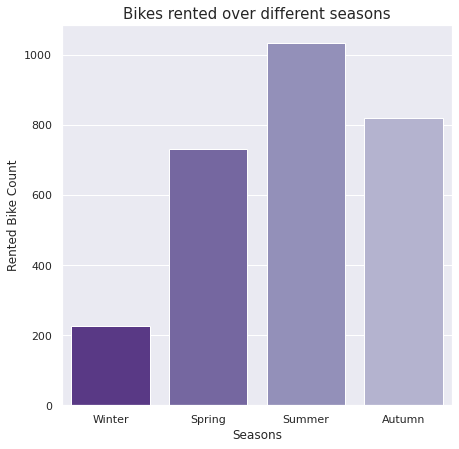

In [22]:
# Chart - 2 Visualization for bikes rented over different seasons
sns.set(rc={"figure.figsize":(7, 7)})
sns.set_palette('Purples_r')
rented_vs_seasons=sns.barplot(data=BikeShare_data,x='Seasons',y='Rented Bike Count',ci=None)
rented_vs_seasons.set_title('Bikes rented over different seasons',fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

The bar graph gives us a better picturization of the distribution of static values over different categories in the dataset. The bar graph provides us with the number of bikes rented over different seasons.

##### 2. What is/are the insight(s) found from the chart?

The average number of bookings in
* Summer - 1034 Rental Bookings
* Spring - 730 Rental Bookings
* Autum - 819 Rental Bookings
* Winter - 225 Rental Bookings

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The average number of bookings in summer is comparatively high, which implies that demand is also high. The need for bikes will be elevated in summer when compared to other seasons.
* The number of bookings is low in autumn, which can also be because of the temperature and the humidity. 

#### **Chart - 5  Bike Rental over different hours in different seasons**

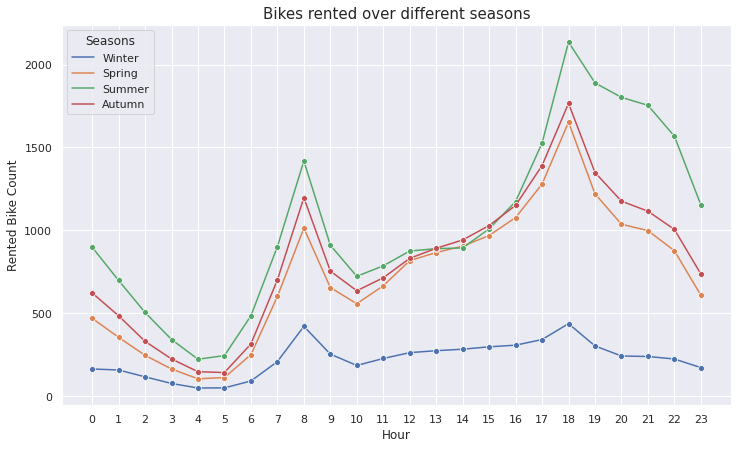

In [23]:
# Chart - 2 Visualization for bikes rented over different seasons
sns.set(rc={"figure.figsize":(12, 7)})
rentedHour_vs_seasons=sns.lineplot(data=BikeShare_data,x='Hour',y='Rented Bike Count',hue='Seasons',ci=None,marker='o')
rentedHour_vs_seasons.set_title('Bikes rented over different seasons',fontsize=15)
rentedHour_vs_seasons.set_xticks(range(24))
plt.show()

##### 1. Why did you pick the specific chart?

A line plot visualizes the changes in two or more variables over the same period and shows the trends over a while. A line plot is the most suitable plot for picturizing the bike rental bookings over different seasons of the year.

##### 2. What is/are the insight(s) found from the chart?

* The graph follows the same trend for all four seasons.
* The maximum number of bookings in the morining is by 8AM.
* The maximum number of booking is the evening is by 6 PM.
* The graph shows a steady increase from 10 Am to 6 PM.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The rental bike bookings follow a pattern for different hours of the day. The hour might be one of the important factors in predicting the rental count.

#### **Chart - 6 Bike Rentals over different Months**

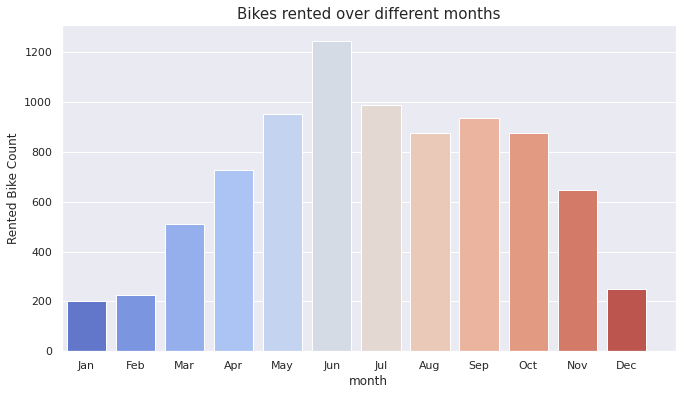

In [24]:
# Chart - 2 Visualization for bikes rented over different seasons
sns.set(rc={"figure.figsize":(11, 6)})
rented_vs_months=sns.barplot(data=BikeShare_data,x='month',y='Rented Bike Count',ci=None,palette='coolwarm')
rented_vs_months.set_title('Bikes rented over different months',fontsize=15)
rented_vs_months.set_xticks(range(13))
rented_vs_months.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

##### 1. Why did you pick the specific chart?

The bar graph helps in the interpretation of the static among different categories of the variables. The average number of bookings in different months is easily picturized through a bar graph.

##### 2. What is/are the insight(s) found from the chart?

* **January** - 202 Rental Bookings
* **February** - 226 Rental Bookings
* **March** - 512 Rental Bookings
* **April** - 728 Rental Bookings
* **May** - 950 Rental Bookings
* **June** - 1246 Rental Bookings
* **July** - 987 Rental Bookings
* **August** - 876 Rental Bookings
* **September** - 936 Rental Bookings
* **October** - 875 Rental Bookings
* **November** - 647 Rental Bookings
* **December** -249 Rental Bookings

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The maximum number of bookings is in June and July.
May, August, September, and October also have more bookings.

* December, January and February have the lower number of bookings.

#### **Chart - 7 Bikes rented over weekend or weekday**

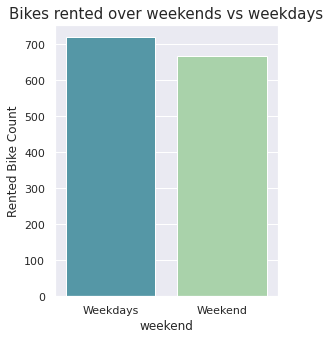

In [25]:
# Chart - 3 Bikes rented over weekend or weekday
sns.set(rc={"figure.figsize":(4, 5)})
sns.set_palette('Spectral_r')
BikeShare_data.weekend.replace({'yes':'Weekend','no':'Weekdays'})
rented_vs_days=sns.barplot(data=BikeShare_data.replace({'yes':'Weekend','no':'Weekdays'}),x='weekend',y='Rented Bike Count',ci=None)
rented_vs_days.set_title('Bikes rented over weekends vs weekdays',fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart provides a clear visual representation of categorical variables for the data with their summary static. A bar chart with hue helps with the effortless comparison between different variables in a single go.

##### 2. What is/are the insight(s) found from the chart?

The average rentals in the 
* Weekends - 720 Rental Bookings
* Week days - 667 Rental Bookings

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The weekday and weekend bookings average doesn't seem to have a lot of difference. The weekday bookings are slightly higher than the weekend bookings.
On average, the difference is not so high. That may be due to the weekend commute being lesser when compared to weekdays. Let's look into the hours and bookings over these variables to make better conclusions.

#### **Chart - 8 Bike rentals hours in weekends**

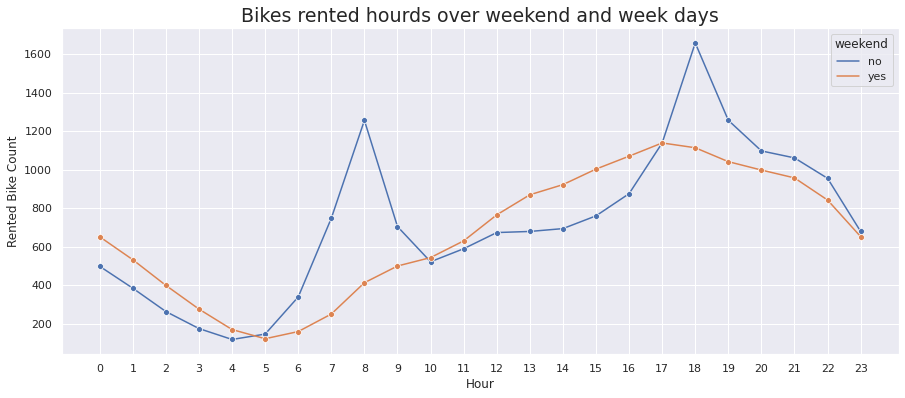

In [26]:
# Chart - 4 Bike rentals hours in weekends
sns.set(rc={"figure.figsize":(15, 6)})
rented_weekend=sns.lineplot(data=BikeShare_data,x='Hour',y='Rented Bike Count',hue='weekend',marker='o',ci=None)
rented_weekend.set_title('Bikes rented hourds over weekend and week days',fontsize=19)
rented_weekend.set_xticks(range(24))
plt.show()

##### 1. Why did you pick the specific chart?

The line plot gives us the trend of the data. With hue in the line plot, we can see more than one trend in the graph. The line graph helps with the interpretation of different trends among different groups in the dataset. 

##### 2. What is/are the insight(s) found from the chart?

* On weekdays there is a peak increase by 8 AM and 6 PM. Whereas, on the weekends, there is no such peak. 
* On weekends, there is an increase from 6 AM to 5 PM, but not with extreme peaks.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The demand for bike rental is high on weekdays at a particular hour. But we don't see any peak on the weekends, and the number of bikes rented is low on weekends compared to weekdays.

#### **Chart - 9 Bike rentals over holidays vs Non-Holidays**

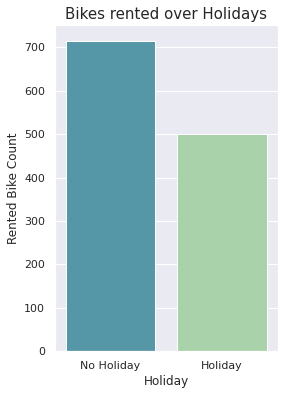

In [27]:
# Chart - 5 Bike rentals over holidays vs Non-Holidays
sns.set(rc={"figure.figsize":(4, 6)})
sns.set_palette('Spectral_r')
rented_vs_days=sns.barplot(data=BikeShare_data,x='Holiday',y='Rented Bike Count',ci=None)
rented_vs_days.set_title('Bikes rented over Holidays',fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

The bar graph shows the difference between the bike rented on holidays and non-holidays. We can compare the difference easily through the bar graph.

##### 2. What is/are the insight(s) found from the chart?

The average number of bikes rented 
* Non -Holidays - 715 bikes rented
* Holidays - 500 bikes rented

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The bikes rented on non-holidays are 20% higher than the bikes rented on holidays. The demand for bikes on holidays is a little lower than the non-holidays.

#### **Chart - 10 Bikes rented over different hours during holidays**

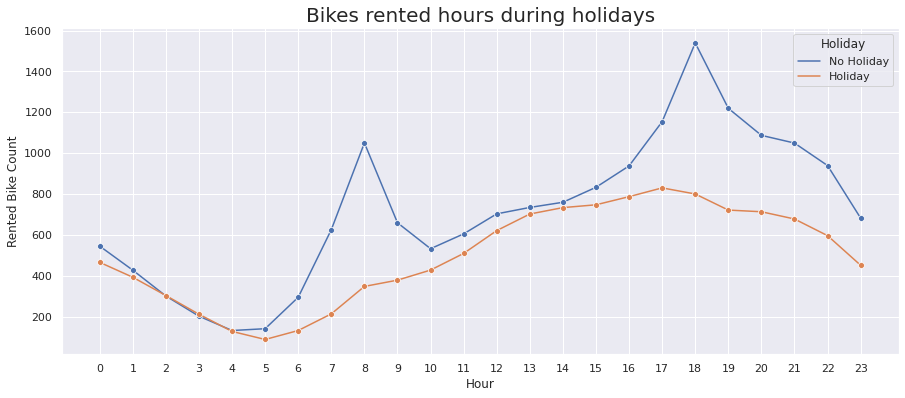

In [28]:
# Chart - 6 visualization of Bikes rented over different hours during holidays
sns.set(rc={"figure.figsize":(15, 6)})
rented_vs_months=sns.lineplot(data=BikeShare_data,x='Hour',y='Rented Bike Count',hue='Holiday',marker='o',ci=None)
rented_vs_months.set_title('Bikes rented hours during holidays',fontsize=20)
rented_vs_months.set_xticks(range(24))
plt.show()

##### 1. Why did you pick the specific chart?

The line plot gives us the trend of the data. With hue in the line plot, we can see more than one trend in the graph. The line graph helps with the interpretation of different trends among different groups in the dataset.

##### 2. What is/are the insight(s) found from the chart?

* There is a peak demand for the bikes on Non-Holiday days at 8 AM and 6 PM.
* There is no peak demand on holiday days.
* The bike rented on holiday days are lesser than Non holiday days.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The graph looks similar to the weekend and weekday charts. Maybe people prefer renting bikes on work days than on holidays.

#### **Chart - 11 Functional Day vs Bike Rental count**

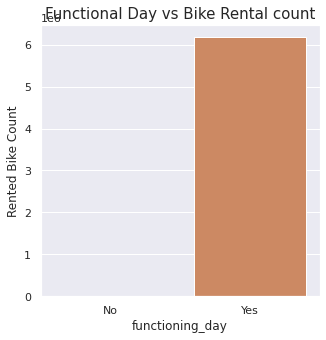

In [29]:
# Chart - 13 visualization code
sns.set(rc={"figure.figsize":(5, 5)})
FuncVsrental=BikeShare_data.groupby('functioning_day')['Rented Bike Count'].sum().reset_index()
sns.barplot(data=FuncVsrental,x='functioning_day',y='Rented Bike Count')
plt.title('Functional Day vs Bike Rental count',fontsize=15)
plt.show()


##### 1. Why did you pick the specific chart?

Bar chart depicts the difference between the two categories namely, functioning and non functioning days.

##### 2. What is/are the insight(s) found from the chart?

There is no bikes rented on non-functioning days.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

When the firm is not functioning, there will be no rentals on that day. So observations with non-functioning days can be removed from the data set because having those observations can decrease the accuracy of the prediction.

#### **Chart - 12 numerical variables vs the dependent varibale**

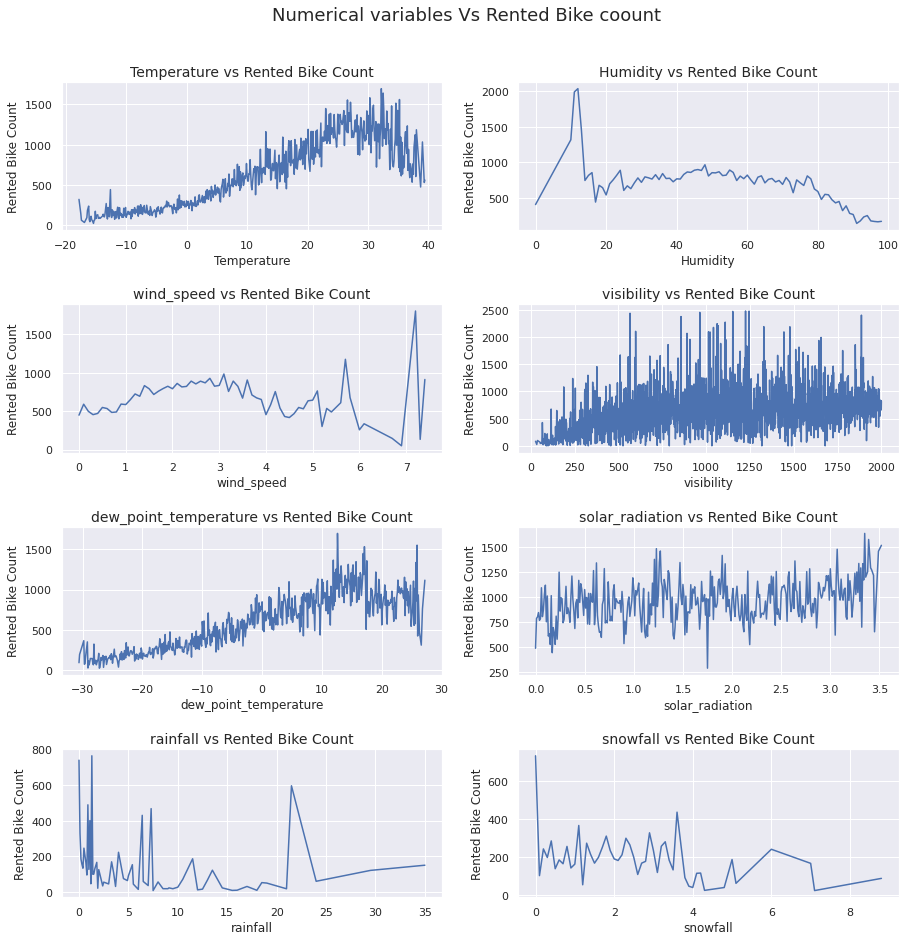

In [30]:
# Chart - 11 visualization the numerical variables vs the dependent varibale
line_data=list(BikeShare_data.describe().columns)
line_data.remove('Rented Bike Count')
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Numerical variables Vs Rented Bike coount", fontsize=18, y=0.95)
count=1
for i in line_data:
  plt.subplot(4,2,count)
  sns.lineplot(data=BikeShare_data,x=i,y='Rented Bike Count',ci=None)
  plt.title( i + ' vs Rented Bike Count',fontsize=14)
  count+=1
plt.show()

##### 1. Why did you pick the specific chart?

The relationship between the numeric features and the dependent variables is implemented through a line graph. A line graph maps all the data points and gives an idea about the relationship between the variables.

##### 2. What is/are the insight(s) found from the chart?

* The rented bike booking is high when the temperature is between 25 and 35 degrees.
* The rented bike booking doesn't show any difference with the change in visibility.
* The rented bike count decreases with the increase in snowfall.
* The rented bike count is high when the rainfall is below 10.
* The rented bike count is high when the dew point temperature is between 10 to 25 degrees.
* The rented bike count is high when the wind speed is high.
* The rented bike count is high when the humidity is low.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The variables such as temperature, dew point temperature, and windspeed are directly proportional to the rental bike bookings.
* The variables such as rainfall, snowfall, and humidity are inversely proportional to the rental bike bookings.

#### **Chart - 13 Regression plot for Numerical Variable**

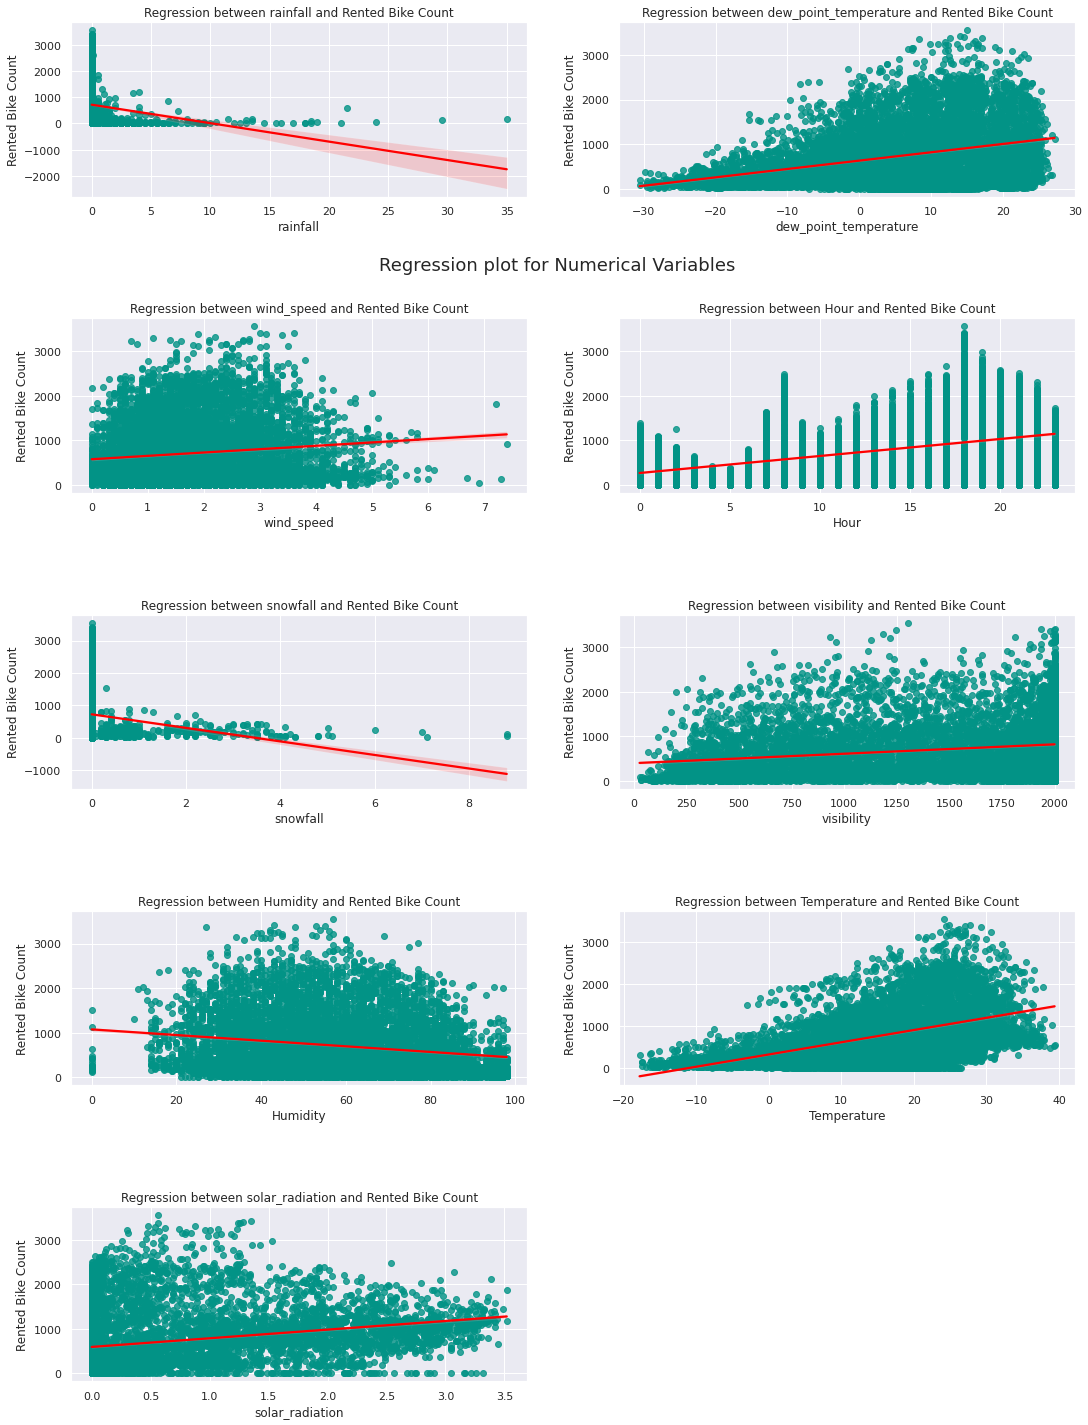

In [31]:
# Chart - 8 visualization code

BikeShare_data['Hour']=BikeShare_data['Hour'].astype('int')
reg_variables=list((set(BikeShare_data.describe().columns)-{'Rented Bike Count'}))
plt.figure(figsize=(18, 25))
plt.subplots_adjust(hspace=0.7)
plt.suptitle("Regression plot for Numerical Variables", fontsize=18, y=0.75)
count=1
for i in reg_variables:
  plt.subplot(5,2,count)
  sns.regplot(x=BikeShare_data[i],y=BikeShare_data['Rented Bike Count'],scatter_kws={'color':'#029386'},line_kws={'color':'red'})
  plt.title('Regression between '+i+' and Rented Bike Count',fontsize=12)
  count+=1
plt.show()

##### 1. Why did you pick the specific chart?

The Regression plot in seaborn helps to visualize the linear relationship between the variables and helps emphasize the patterns in the dataset.  The regression line is an attempt to find the best-fit line through the scatter plot points.

##### 2. What is/are the insight(s) found from the chart?

* The regression line for an hour does have a positive relationship.
* The regression line for visibility does show any positive or negative relationship. The variable may not have any importance in predicting the rented bike count
* The regression line for snowfall, rainfall, and humidity has a negative relationship.
* Temperature, dew point temperature, wind speed, and Solar radiation has a positive relationship.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The regression plot establishes the relationship between the dependent variable and each independent numerical value. But there is a possibility for multicollinearity between the variables.
* Visibility doesn't affect the dependent variable Rented Bike count.

#### **Chart - 14 Correlation**

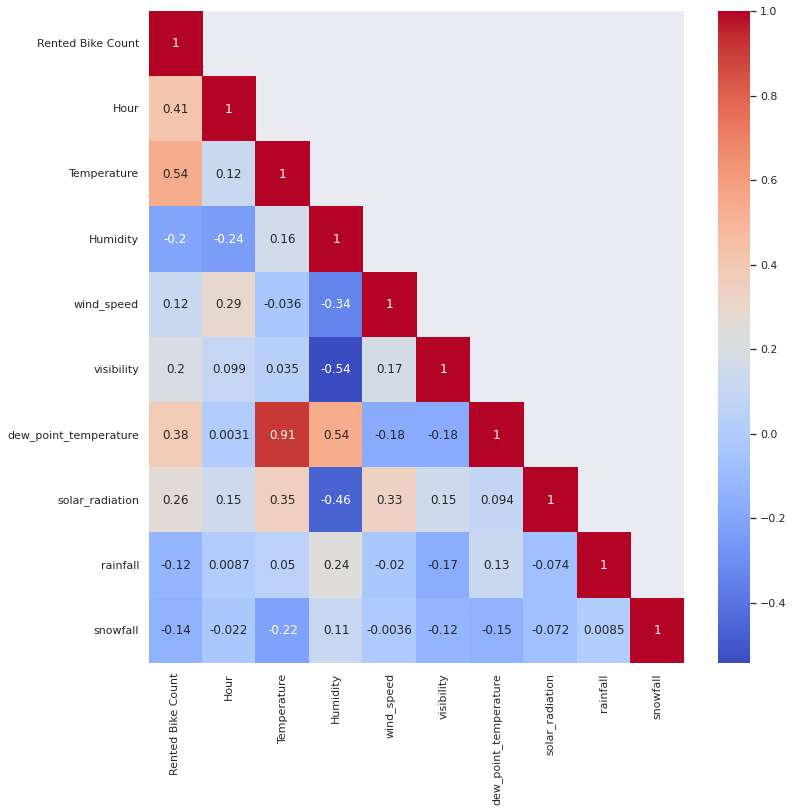

In [32]:
# Chart - 9 Correlation between variables
sns.set(rc={"figure.figsize":(12,12)})
corr=np.array(BikeShare_data.corr())
corr[np.tril_indices_from(corr)]=False
sns.heatmap(BikeShare_data.corr(),annot=True,mask=corr,cmap='coolwarm')
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. The correlation heatmap uses different colors to indicate the relationship between the variables. Heatmap helps in the faster interpretation of the relationships between the variable.



##### 2. What is/are the insight(s) found from the chart?

* The dew point temperature and temperature are highly correlated.
There might be multicollinearity between these variables. 
* Dew point temperature and Humidity has a correlation of 0.54
* Snowfall, rainfall and Humidity have negatvely correlated with the Rented Bike Count.

####  **Chart - 15 Box plot to detect outliers**

In [33]:
# Chart - 12 visualization code
sns.set(rc={"figure.figsize":(15,10)})
b=BikeShare_data.copy()


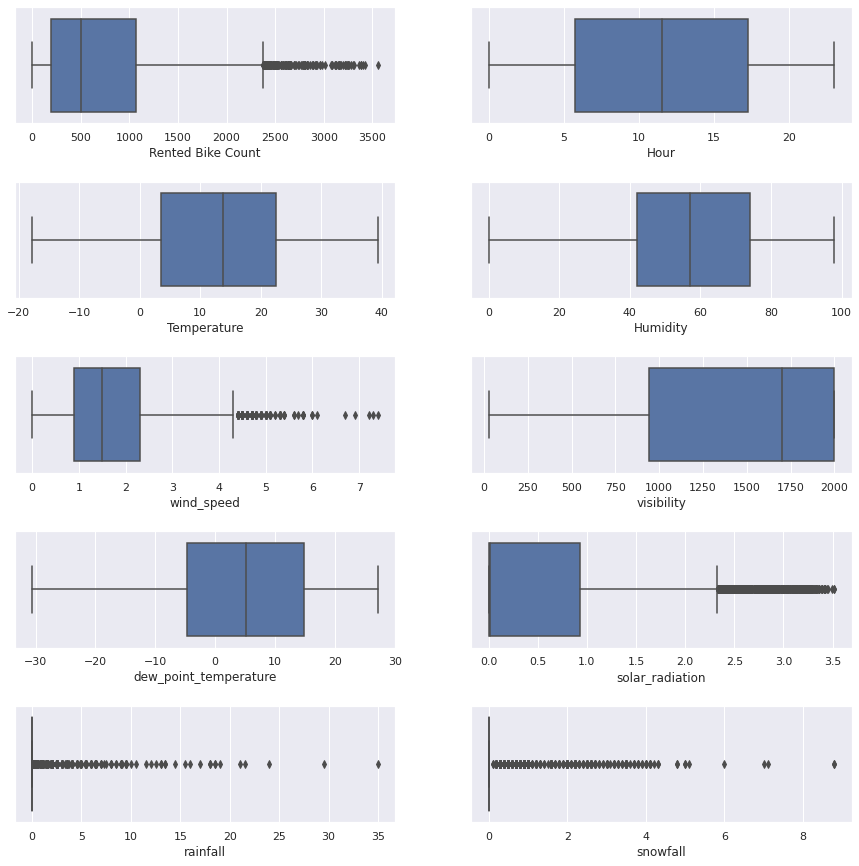

In [34]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)
count=1
for i in BikeShare_data.describe().columns:
  plt.subplot(5,2,count)
  sns.boxplot(BikeShare_data[i])
  count+=1
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is one of the best ways to see the distribution of data with different segments. It displays the quartiles of the data with an inter quartile range. The data away form the first and last whiskers are the outliers.

##### 2. What is/are the insight(s) found from the chart?

columns with outliers
>* Rented Bike count
* Solar radiation
* wind speed
* rainfall
* snowfall

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The columns with outliers are handles by doing transformations such as square root, cube root or logarithm transformations to the columns to get a better predictions.

#### Chart - 15 - Pair Plot 

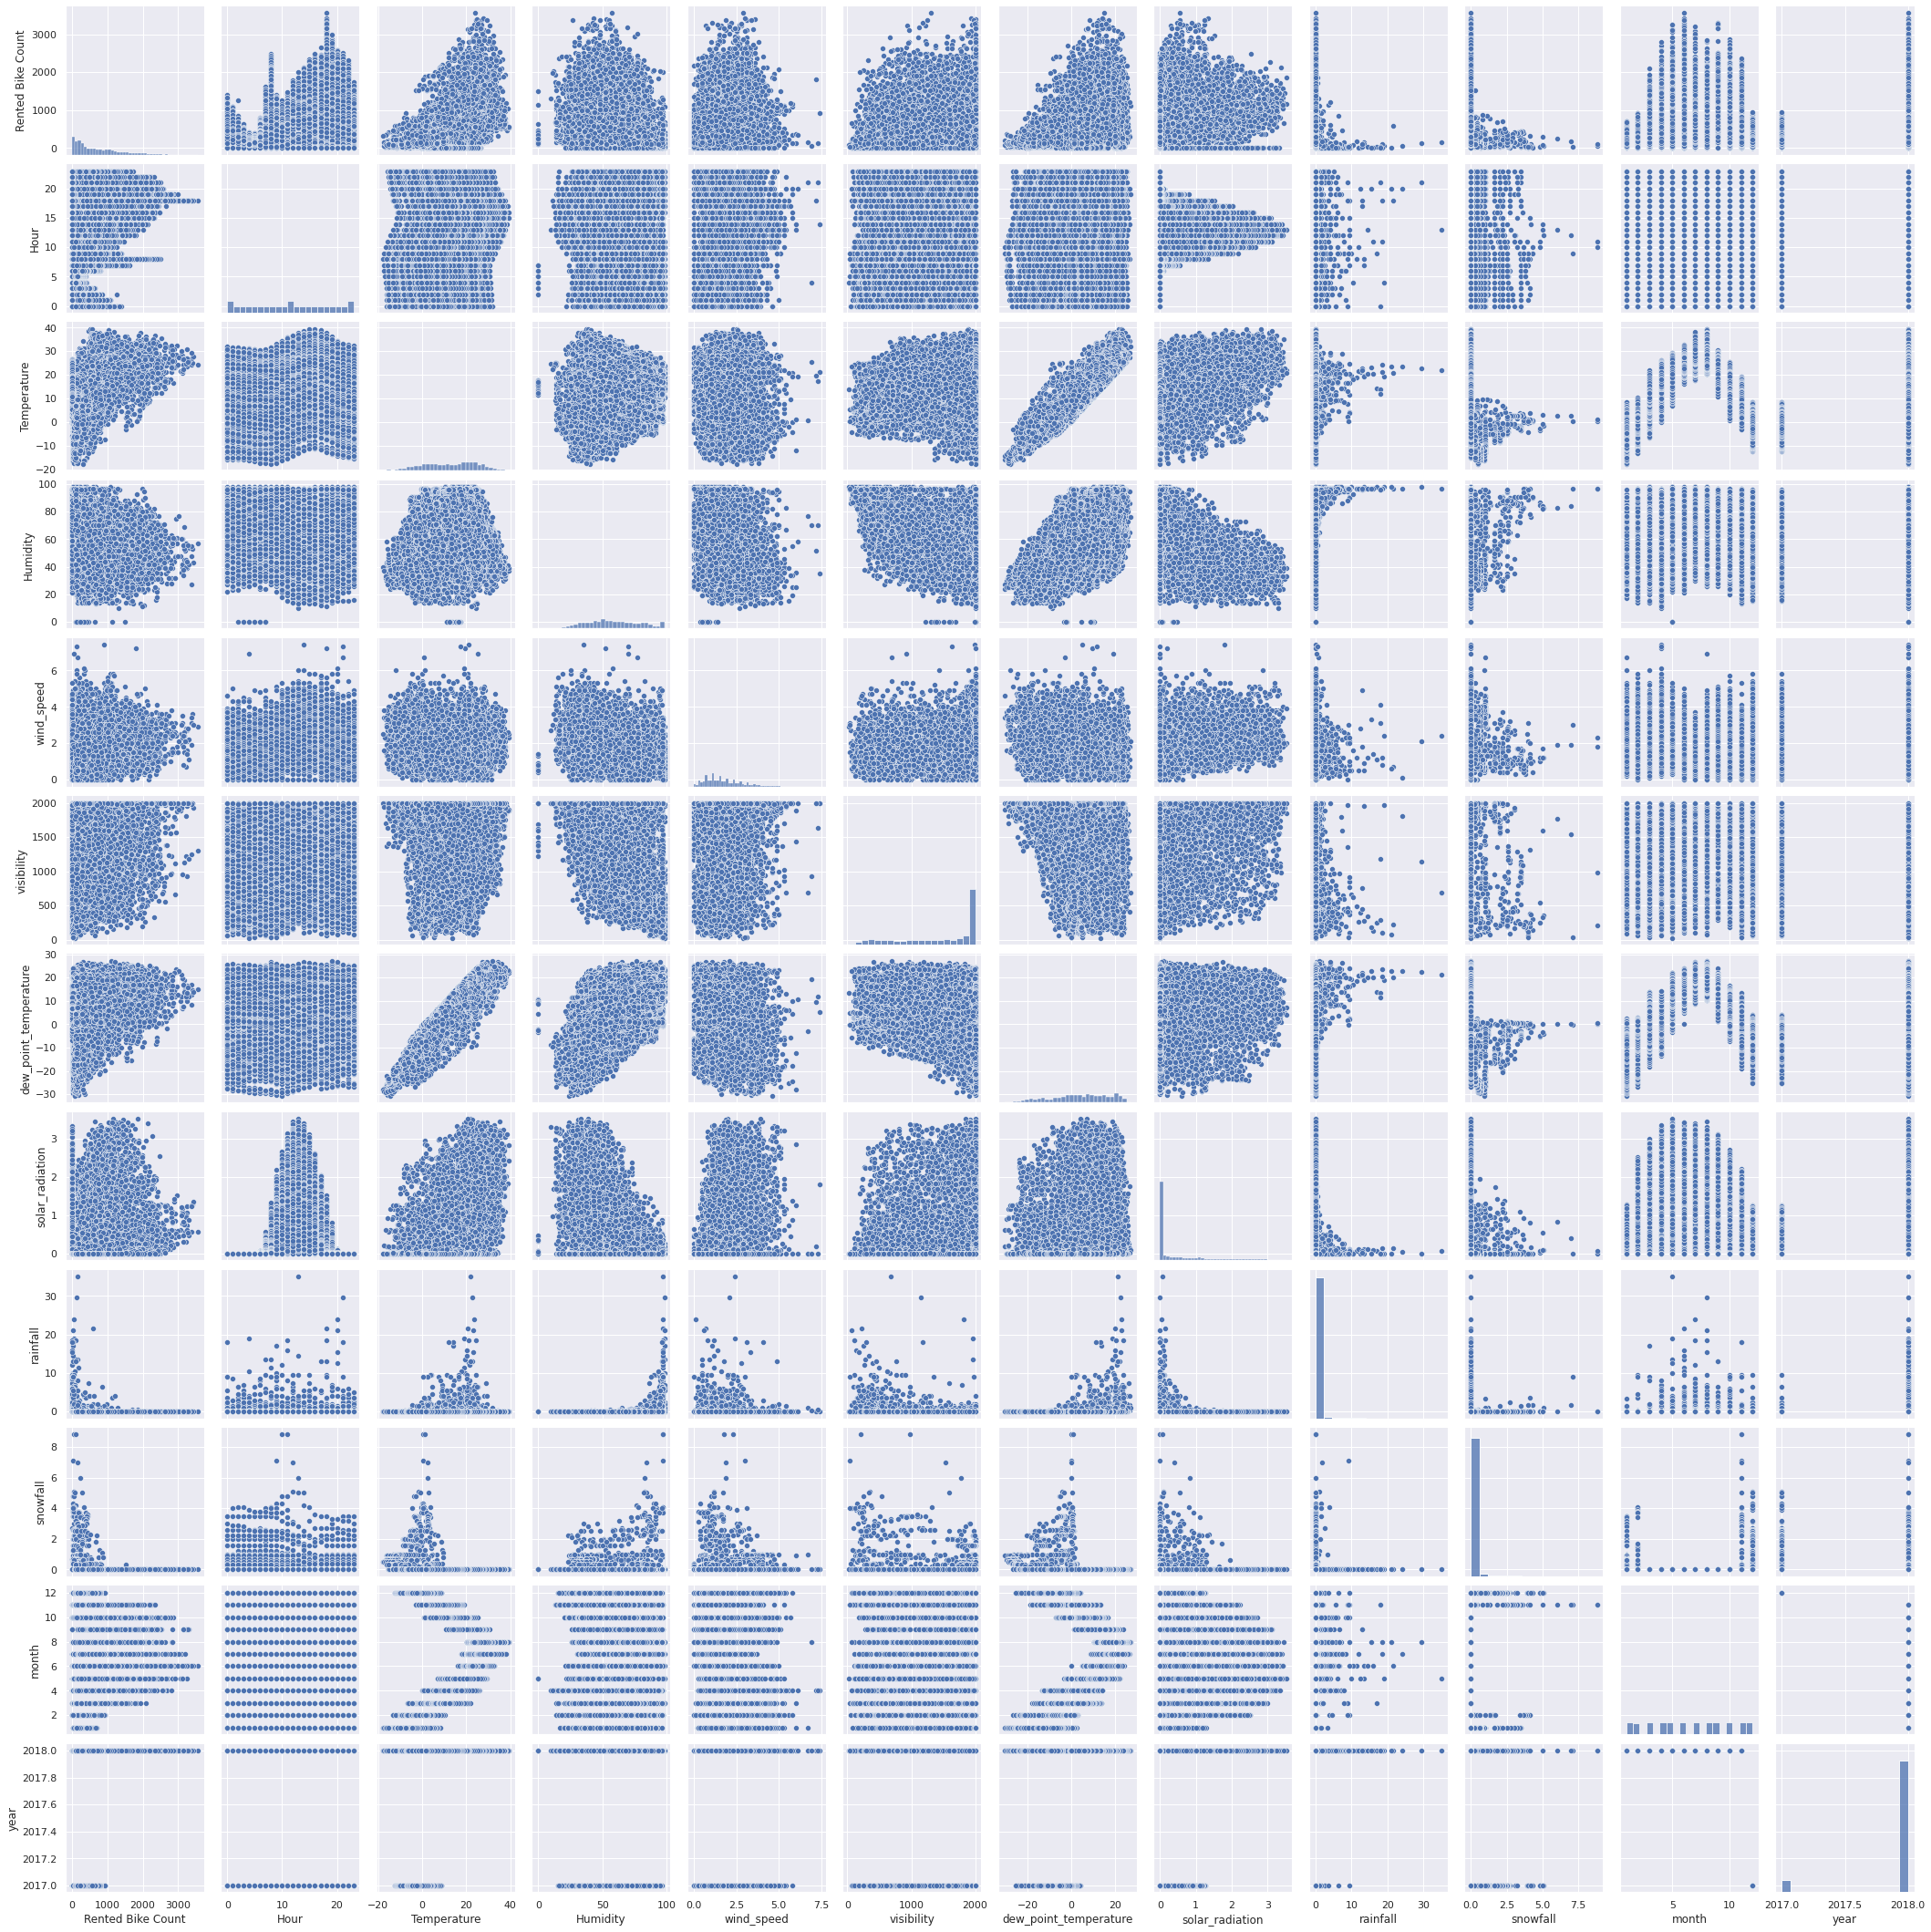

In [35]:
# Pair Plot visualization code
sns.pairplot(BikeShare_data)

##### 1. Why did you pick the specific chart?

The pair plot gives us the bivariate distribution between all the variables in the dataset. A pair plot helps in finding the relationship between variables.

Answer Here

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [36]:
# Handling Missing Values & Missing Value Imputation
BikeShare_data.isna().any()

Date                     False
Rented Bike Count        False
Hour                     False
Temperature              False
Humidity                 False
wind_speed               False
visibility               False
dew_point_temperature    False
solar_radiation          False
rainfall                 False
snowfall                 False
Seasons                  False
Holiday                  False
functioning_day          False
month                    False
year                     False
day                      False
weekend                  False
dtype: bool

#### What all missing value imputation techniques have you used and why did you use those techniques?

There is no missing values in the data set.

### 2. Categorical Encoding

In [37]:
# grouping functional day
functional=BikeShare_data.groupby(['functioning_day']).agg({'Rented Bike Count':'sum'}).reset_index()
functional

functioning_day  Rented Bike Count
0              No                  0
1             Yes            6172314

In [38]:
#creating a copy of data
bike_df=BikeShare_data.copy()
bike_df = bike_df.query('functioning_day == "Yes"')

In [39]:
#seeing the shape of the new dataframe
bike_df.shape

(8465, 18)

In [40]:
# Encode your categorical columns
bike_df.drop(columns=['Date','functioning_day'],inplace=True)
bike_df[['Seasons','Holiday','month','year','day','weekend']]=bike_df[['Seasons','Holiday','month','year','day','weekend']].apply(LabelEncoder().fit_transform)

In [41]:
bike_df.head()

Rented Bike Count  Hour  Temperature  Humidity  wind_speed  visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   dew_point_temperature  solar_radiation  rainfall  snowfall  Seasons  \
0                  -17.6              0.0       0.0       0.0        3   
1                  -17.6              0.0       0.0       0.0        3   
2                  -17.7              0.0       0.0       0.0        3   
3                  -17.6              0.0       0.0       0.0        3   
4                  -18.6              0.0       0.0       0.0        3   

   Holiday  month  year  day  weekend  
0        1     11     0    0        0  
1        1     11     0    0        0  
2        1     11     0    0        0  
3        1     11     0    0        0  
4        1     11     0    0        0

#### What all categorical encoding techniques have you used & why did you use those techniques?

The dataset contains a functioning day column with values of yes and no. Yes, when the firm is operating, else is mentioned as no. The rented bike count is Zero whenever the entry in the functioning_day column is no. So we can drop the observations with zero in the functioning_day column from the dataset. Keeping these extra data in the dataset may lead to inaccuracy in the predictions.

There are different types of encoding techniques in machine learning. I am using label encoding to encode the categorical columns. Using one hot encoding will increase the number of columns in the dataset, whereas label encoding doesn't increase the number of columns. In label encoding, every unique element in the category takes a numeric value. 

The categorical columns holidays, seasons, months, years, and weekends are encoded using a label encoder.


### 3. Feature Manipulation & Selection

In [42]:
# Manipulate Features to minimize feature correlation and create new features
bikeshare =BikeShare_data.copy()
VIF =pd.DataFrame()
numeric_variables=list(set(bikeshare.describe().columns)-{'Rented Bike Count'})
VIF['features']=numeric_variables
VIF['vif']=[vif(bikeshare[numeric_variables].values,i) for i in range(len(numeric_variables))]
VIF

features        vif
0               rainfall   1.081567
1  dew_point_temperature  17.126199
2             wind_speed   4.805364
3                   Hour   4.418242
4               snowfall   1.120833
5             visibility   9.085977
6               Humidity   5.371996
7            Temperature  33.385256
8        solar_radiation   2.881590

In [43]:
bikeshare.drop(columns=['dew_point_temperature'],inplace=True)
VIF =pd.DataFrame()
numeric_variables=list(set(bikeshare.describe().columns)-{'Rented Bike Count'})
VIF['features']=numeric_variables
VIF['vif']=[vif(bikeshare[numeric_variables].values,i) for i in range(len(numeric_variables))]
VIF

features       vif
0         rainfall  1.079158
1       wind_speed  4.608625
2             Hour  3.921832
3         snowfall  1.120579
4       visibility  4.710170
5         Humidity  4.868221
6      Temperature  3.228318
7  solar_radiation  2.246791

In [44]:
# Select your features wisely to avoid overfitting
bike_df.drop(columns=['dew_point_temperature'],inplace=True)

##### What all feature selection methods have you used  and why?

Multicollinearity is a factor that reduces the effectiveness of the algorithm. Multicollinearity exists when there is a high correlation between the independent variables. In regression, we assume there is no multicollinearity between the independent variables. To reduce multicollinearity, we perform a few analyses of the data set. One such method to check multicollinearity is the Variance inflation factor.

The variance inflation factor gives the measure of multicollinearity between the independent variables. The ideal value must be below 5. If we have a value greater than 5, then multicollinearity is present in the data.

##### Which all features you found important and why?

 In the given dataset, we drop the column dew point temperature because of the high vif value and highly correlated with the temperature column. 

After removing the dew point temperature column, the variance inflation factor value lies within the range for all other independent variables.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

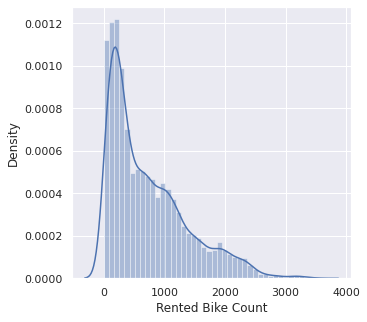

In [45]:
# Transform Your data
sns.set(rc={"figure.figsize":(5, 5)})
sns.distplot(bike_df['Rented Bike Count'])

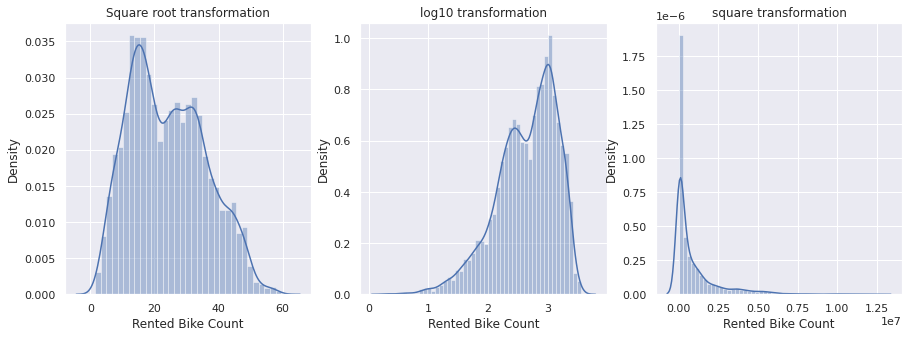

In [46]:
sns.set(rc={"figure.figsize":(15, 5)})
plt.subplot(1,3,1)
sns.distplot(np.sqrt(bike_df['Rented Bike Count']))
plt.title('Square root transformation')
plt.subplot(1,3,2)
sns.distplot(np.log10(bike_df['Rented Bike Count']))
plt.title('log10 transformation')
plt.subplot(1,3,3)
sns.distplot((bike_df['Rented Bike Count'])**2)
plt.title('square transformation')
plt.show()

To perform linear regression, we assume that the dependent variable follows a normal distribution. In our cast, the dependent variable Rental bike count is not following a normal distribution.

I applied transformations, such as square transformation, square root, and logarithm transformation, to see which follows a normal distribution. 


By visualizing the transformations, it is clear that square root transformation follows a normal distribution.

### 6. Data Scaling

In [47]:
# Scaling your data
independent_variables=list(set(bike_df.columns)-{'Rented Bike Count'})
x=bike_df[independent_variables]
y=np.sqrt(bike_df['Rented Bike Count'])
scale=StandardScaler()
x=scale.fit_transform(x)

##### Which method have you used to scale you data and why?

Scaling helps the machine learning algorithm to work faster and better. I have used a Standard scaler in this project because a standard scaler gives a standard distribution with zero mean and one standard deviation.

### 8. Data Splitting

In [48]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)


In [49]:
#checking thw shapes of the test and train_data
print(f'Shape of x test :{x_train.shape}')
print(f'Shape of x test :{x_test.shape}')
print(f'Shape of x test :{y_train.shape}')
print(f'Shape of x test :{y_test.shape}')


Shape of x test :(6772, 14)
Shape of x test :(1693, 14)
Shape of x test :(6772,)
Shape of x test :(1693,)


##### What data splitting ratio have you used and why? 

I have chosen  0.2 as my train test ratio. The data is split into 80% training and 20% test data. When a machine learning algorithm gets more data to train, it performs better with unseen data than training with lesser data.

## ***6. ML Model Implementation***

### **ML Model - 1 Linear Regression**

In [50]:
# ML Model - 1 Linear Regression
# Fit the Algorithm
reg=LinearRegression().fit(x_train,y_train)
#intercept for regression
reg.intercept_

24.242445702538785

In [51]:
#coeff of the regression
reg.coef_

array([-1.84092828,  0.72461524, -0.74756867,  0.46552237,  0.03577776,
       -0.19870219,  3.47134754, -2.29793008,  0.10218889,  0.02304411,
        0.10792864, -3.38998687,  6.74938786, -0.77755588])

In [52]:
test_predict=reg.predict(x_test)
#score of train set
reg.score(x_train,y_train)

0.6127635684573378

In [53]:
#score of test set
reg.score(x_test,y_test)

0.6449821747506255

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [54]:
Evaluation_chart=pd.DataFrame(columns=['R2','MSE','RMSE','MAE','MAPE'])

In [55]:
#  creating a function to print the errors
def error(x,y,z):
  r2=round(r2_score(x,y),2)
  MSE=round(mean_squared_error(x,y),2)
  RMSE=round(np.sqrt(mean_squared_error(x,y)),2)
  MAE=round(mean_absolute_error(x,y),2)
  MAPE=round(mean_absolute_percentage_error(x,y),4)*100
  print(f'R2_ score {z} data = {(r2)}')
  print(f'Mean Squared Error for the {z} data = {MSE}')
  print(f'Root Mean Squared Error for the {z} data = {RMSE}')
  print(f'Mean Absolute Error for the {z} data = {MAE}')
  print(f'Mean Absolute Percentage error for the {z} data = {MAPE}%')


In [56]:
#Errors for train data in Linear Regression
error(y_train,reg.predict(x_train),'Train')

R2_ score Train data = 0.61
Mean Squared Error for the Train data = 54.18
Root Mean Squared Error for the Train data = 7.36
Mean Absolute Error for the Train data = 5.64
Mean Absolute Percentage error for the Train data = 34.47%


In [57]:
#Errors for test data in linear Regression
error(y_test,reg.predict(x_test),'Test')

R2_ score Test data = 0.64
Mean Squared Error for the Test data = 50.86
Root Mean Squared Error for the Test data = 7.13
Mean Absolute Error for the Test data = 5.53
Mean Absolute Percentage error for the Test data = 32.5%


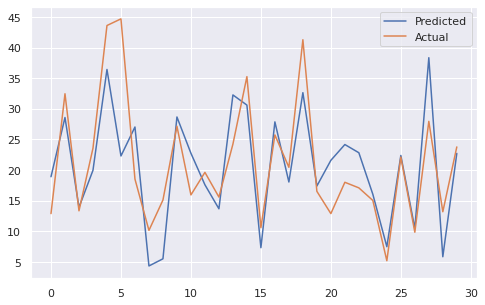

In [58]:
#visualzing the predicted and actual values
plt.figure(figsize=(8,5))
plt.plot(reg.predict(x_test[:30]))
plt.plot((np.array(y_test[:30])))
plt.legend(["Predicted","Actual"])
plt.show()

In [59]:
Evaluation_chart.loc['Linear']=({'R2':round(r2_score(y_test,reg.predict(x_test)),2),'MSE':round(mean_squared_error(y_test,reg.predict(x_test)),2),'RMSE':round(np.sqrt(mean_squared_error(y_test,reg.predict(x_test))),2),'MAE':round(mean_absolute_error(y_test,reg.predict(x_test)),2),'MAPE':round(mean_absolute_percentage_error(y_test,reg.predict(x_test)),4)*100})
Evaluation_chart

R2    MSE  RMSE   MAE  MAPE
Linear  0.64  50.86  7.13  5.53  32.5

The Linear regression for the tet and train dataset is executed. The r2 score for the train data is 0.61 anthe test data set is 0.64. Mean squared erroe for train data is 54.18 and test data is 50.86. The Men absolute percentage error for test data set is 34.47% and for the train dataset is 32.5%

### **ML Model - 2 Lasso Regression**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [60]:
# Visualizing evaluation Metric Score chart
lasso=Lasso(alpha=0.5,max_iter=3000).fit(x_train,y_train)
#lasso intersept
lasso.coef_

array([-1.42634081,  0.2004451 , -0.21866931,  0.24726858,  0.        ,
        0.        ,  3.17262636, -1.88674112,  0.        , -0.        ,
        0.14651496, -2.43710473,  5.94319098,  0.        ])

In [61]:
lasso.intercept_

24.237975566562913

In [62]:
lasso.predict(x_test)

array([18.96690937, 30.03127258, 16.10065101, ..., 15.71500692,
       26.98498833, 30.09906962])

In [63]:
lasso.score(x_test,y_test)

0.6313049794556308

In [64]:
#Errors for train data in lasso Regression
error(y_train,lasso.predict(x_train),'Train')

R2_ score Train data = 0.6
Mean Squared Error for the Train data = 56.24
Root Mean Squared Error for the Train data = 7.5
Mean Absolute Error for the Train data = 5.74
Mean Absolute Percentage error for the Train data = 35.870000000000005%


In [65]:
#Errors for train data in lasso Regression
error(y_test,lasso.predict(x_test),'Test')

R2_ score Test data = 0.63
Mean Squared Error for the Test data = 52.81
Root Mean Squared Error for the Test data = 7.27
Mean Absolute Error for the Test data = 5.62
Mean Absolute Percentage error for the Test data = 33.629999999999995%


In [66]:
# updating the evaluation chart
Evaluation_chart.loc['Lasso']=({'R2':round(r2_score(y_test,lasso.predict(x_test)),2),'MSE':round(mean_squared_error(y_test,lasso.predict(x_test)),2),'RMSE':round(np.sqrt(mean_squared_error(y_test,lasso.predict(x_test))),2),'MAE':round(mean_absolute_error(y_test,lasso.predict(x_test)),2),'MAPE':round(mean_absolute_percentage_error(y_test,lasso.predict(x_test)),4)*100})

In [67]:
Evaluation_chart

R2    MSE  RMSE   MAE   MAPE
Linear  0.64  50.86  7.13  5.53  32.50
Lasso   0.63  52.81  7.27  5.62  33.63

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
lassogrid=GridSearchCV(estimator=Lasso(),param_grid={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,0.014,0.06,0.2,0.5,0.6,1,5,10,20,30,40,45,50,55,60,100]},scoring='r2',cv=5).fit(x_train,y_train)

In [69]:
lassogrid.score(x_test,y_test)

0.6449552786857917

In [70]:
lassogrid.best_params_

{'alpha': 0.01}

In [71]:
#Errors for train data in lasso Regression
error(y_train,lassogrid.predict(x_train),'Train')

R2_ score Train data = 0.61
Mean Squared Error for the Train data = 54.19
Root Mean Squared Error for the Train data = 7.36
Mean Absolute Error for the Train data = 5.64
Mean Absolute Percentage error for the Train data = 34.47%


In [72]:
#Errors for train data in lasso Regression
error(y_test,lassogrid.predict(x_test),'Test')

R2_ score Test data = 0.64
Mean Squared Error for the Test data = 50.86
Root Mean Squared Error for the Test data = 7.13
Mean Absolute Error for the Test data = 5.53
Mean Absolute Percentage error for the Test data = 32.5%


In [73]:
# updating the evaluation chart
Evaluation_chart.loc['LassoGrid']=({'R2':round(r2_score(y_test,lassogrid.predict(x_test)),2),'MSE':round(mean_squared_error(y_test,lassogrid.predict(x_test)),2),'RMSE':round(np.sqrt(mean_squared_error(y_test,lassogrid.predict(x_test))),2),'MAE':round(mean_absolute_error(y_test,lassogrid.predict(x_test)),2),'MAPE':round(mean_absolute_percentage_error(y_test,lassogrid.predict(x_test)),4)*100})
Evaluation_chart

R2    MSE  RMSE   MAE   MAPE
Linear     0.64  50.86  7.13  5.53  32.50
Lasso      0.63  52.81  7.27  5.62  33.63
LassoGrid  0.64  50.86  7.13  5.53  32.50

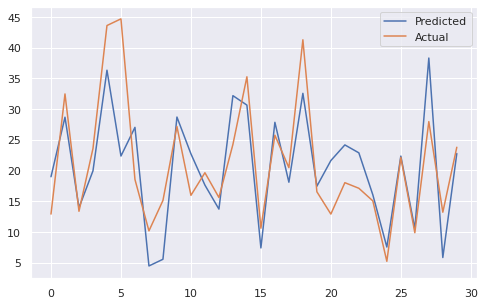

In [74]:
#visualzing the predicted and actual values
plt.figure(figsize=(8,5))
plt.plot(lassogrid.predict(x_test[:30]))
plt.plot((np.array(y_test[:30])))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Gridsearch CV helps in hypertuning the different parameters and gives the best results. Where as in lasso regression we can give only one alpha value but in srid search CV we can give a multiple alpha values and get the best results.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For lasso regression the alpha value is set to 0.5 and the r2 score for the train data is 0.63 andt the test data is 0.63 and 0.6.

In gridsearchcv the best fit alpha is 0.01. The r2 score fot the train data is 0.64 and the test data is 0.61.
Mean Squared Error for the Train data is 54.19 and Test data is 50.86.
The Root Mean Squared Error for the Train data is 7.36 and Test data is 7.13
The Mean absolute error for the Train data is 5.64 and Test data is 5.53. Mean Absolute Percentage error for the Train data is 34.47% and Test data is 32.5%



### **ML Model - 3 Ridge Regression**

In [75]:
# ML Model - 3 Implementation
ridge=Ridge(alpha=0.7).fit(x_train,y_train)

# Predict on the model
ridge.predict(x_train)

array([12.99748705, 32.62904872, 16.47773491, ..., 32.1129629 ,
       22.3792622 , 25.91894226])

In [76]:
ridge.score(x_train,y_train)

0.6127635522421404

In [77]:
ridge.score(x_test,y_test)

0.6449805455733386

In [78]:
#Errors for train data in lasso Regression
error(y_train,ridge.predict(x_train),'Train')

R2_ score Train data = 0.61
Mean Squared Error for the Train data = 54.18
Root Mean Squared Error for the Train data = 7.36
Mean Absolute Error for the Train data = 5.64
Mean Absolute Percentage error for the Train data = 34.47%


In [79]:
#Errors for train data in lasso Regression
error(y_test,ridge.predict(x_test),'Test')

R2_ score Test data = 0.64
Mean Squared Error for the Test data = 50.86
Root Mean Squared Error for the Test data = 7.13
Mean Absolute Error for the Test data = 5.53
Mean Absolute Percentage error for the Test data = 32.5%


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [80]:
# Visualizing evaluation Metric Score chart
# updating the evaluation chart
Evaluation_chart.loc['Ridge']=({'R2':round(r2_score(y_test,ridge.predict(x_test)),2),'MSE':round(mean_squared_error(y_test,ridge.predict(x_test)),2),'RMSE':round(np.sqrt(mean_squared_error(y_test,ridge.predict(x_test))),2),'MAE':round(mean_absolute_error(y_test,ridge.predict(x_test)),2),'MAPE':round(mean_absolute_percentage_error(y_test,ridge.predict(x_test)),4)*100})
Evaluation_chart

R2    MSE  RMSE   MAE   MAPE
Linear     0.64  50.86  7.13  5.53  32.50
Lasso      0.63  52.81  7.27  5.62  33.63
LassoGrid  0.64  50.86  7.13  5.53  32.50
Ridge      0.64  50.86  7.13  5.53  32.50

#### 2. Cross- Validation & Hyperparameter Tuning

In [81]:
# ML Model - 3 Implementation with hyperparameter optimization techniques 

ridgegrid=GridSearchCV(estimator=Ridge(),param_grid={'alpha':[0.001,0.0001,0.000001,0.01,0.1,1]},cv=5).fit(x_train,y_train)

# Predict on the model
ridgegrid.predict(x_test)

array([18.90751364, 28.57892159, 13.90287563, ..., 15.57212663,
       24.92752072, 30.05514452])

In [82]:
# finding the best alpha
ridgegrid.best_params_

{'alpha': 1}

In [83]:
ridgegrid.best_score_

0.6110253350929001

In [84]:
ridgegrid.score(x_test,y_test)

0.6449798376875195

In [85]:
#Errors for train data in lasso Regression
error(y_train,ridgegrid.predict(x_train),'Train')

R2_ score Train data = 0.61
Mean Squared Error for the Train data = 54.18
Root Mean Squared Error for the Train data = 7.36
Mean Absolute Error for the Train data = 5.64
Mean Absolute Percentage error for the Train data = 34.47%


In [86]:
#Errors for train data in lasso Regression
error(y_test,ridgegrid.predict(x_test),'Test')

R2_ score Test data = 0.64
Mean Squared Error for the Test data = 50.86
Root Mean Squared Error for the Test data = 7.13
Mean Absolute Error for the Test data = 5.53
Mean Absolute Percentage error for the Test data = 32.5%


In [87]:
# Visualizing evaluation Metric Score chart
# updating the evaluation chart
Evaluation_chart.loc['RidgeGrid']=({'R2':round(r2_score(y_test,ridgegrid.predict(x_test)),2),'MSE':round(mean_squared_error(y_test,ridgegrid.predict(x_test)),2),'RMSE':round(np.sqrt(mean_squared_error(y_test,ridgegrid.predict(x_test))),2),'MAE':round(mean_absolute_error(y_test,ridgegrid.predict(x_test)),2),'MAPE':round(mean_absolute_percentage_error(y_test,ridgegrid.predict(x_test)),4)*100})
Evaluation_chart

R2    MSE  RMSE   MAE   MAPE
Linear     0.64  50.86  7.13  5.53  32.50
Lasso      0.63  52.81  7.27  5.62  33.63
LassoGrid  0.64  50.86  7.13  5.53  32.50
Ridge      0.64  50.86  7.13  5.53  32.50
RidgeGrid  0.64  50.86  7.13  5.53  32.50

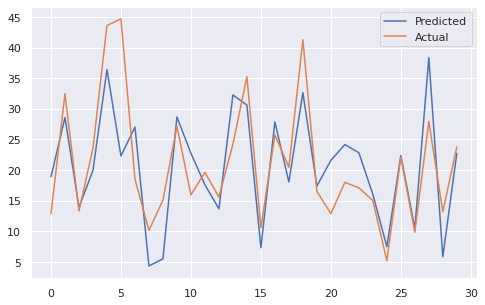

In [88]:
#visualzing the predicted and actual values
plt.figure(figsize=(8,5))
plt.plot(ridgegrid.predict(x_test[:30]))
plt.plot((np.array(y_test[:30])))
plt.legend(["Predicted","Actual"])
plt.show()

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For ridge regression the alpha value is set to 0.6 and the r2 score for the train data is 0.63 andt the test data is 0.64 and 0.61.

In gridsearchcv the best fit alpha is 0.1. The r2 score fot the train data is 0.64 and the test data is 0.61.
Mean Squared Error for the Train data is 54.19 and Test data is 50.86.
The Root Mean Squared Error for the Train data is 7.36 and Test data is 7.13
The Mean absolute error for the Train data is 5.64 and Test data is 5.53. Mean Absolute Percentage error for the Train data is 34.47% and Test data is 32.5%



### **ML Model - 4 ElasticNet Regression**

In [89]:
# ML Model - 3 Implementation
elasticnet=ElasticNet(alpha=0.7,l1_ratio=0.001).fit(x_train,y_train)

# Predict on the model
elasticnet.predict(x_train)

array([17.32780553, 32.93465706, 18.53150076, ..., 28.54239128,
       23.39320618, 25.78754158])

In [90]:
#coefficients of elastic net
elasticnet.coef_

array([-1.13763471,  0.45884193, -0.38599996,  1.03234325,  0.20941174,
        0.79519294,  2.36262006, -1.40582637,  0.04282884, -0.43490619,
        0.71966239, -1.18262395,  3.28575821,  0.83856893])

In [91]:
elasticnet.score(x_train,y_train)

0.535163557517159

In [92]:
elasticnet.score(x_test,y_test)

0.5606450650896002

In [93]:
#Errors for train data in lasso Regression
error(y_test,elasticnet.predict(x_test),'Test')

R2_ score Test data = 0.56
Mean Squared Error for the Test data = 62.94
Root Mean Squared Error for the Test data = 7.93
Mean Absolute Error for the Test data = 6.2
Mean Absolute Percentage error for the Test data = 38.01%


In [94]:
#Errors for train data in lasso Regression
error(y_train,elasticnet.predict(x_train),'Train')

R2_ score Train data = 0.54
Mean Squared Error for the Train data = 65.04
Root Mean Squared Error for the Train data = 8.06
Mean Absolute Error for the Train data = 6.32
Mean Absolute Percentage error for the Train data = 40.400000000000006%


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [95]:
# Visualizing evaluation Metric Score chart
# updating the evaluation chart
Evaluation_chart.loc['ElasticNet']=({'R2':round(r2_score(y_test,elasticnet.predict(x_test)),2),'MSE':round(mean_squared_error(y_test,elasticnet.predict(x_test)),2),'RMSE':round(np.sqrt(mean_squared_error(y_test,elasticnet.predict(x_test))),2),'MAE':round(mean_absolute_error(y_test,elasticnet.predict(x_test)),2),'MAPE':round(mean_absolute_percentage_error(y_test,elasticnet.predict(x_test)),4)*100})
Evaluation_chart

R2    MSE  RMSE   MAE   MAPE
Linear      0.64  50.86  7.13  5.53  32.50
Lasso       0.63  52.81  7.27  5.62  33.63
LassoGrid   0.64  50.86  7.13  5.53  32.50
Ridge       0.64  50.86  7.13  5.53  32.50
RidgeGrid   0.64  50.86  7.13  5.53  32.50
ElasticNet  0.56  62.94  7.93  6.20  38.01

#### 2. Cross- Validation & Hyperparameter Tuning

In [96]:
# ML Model - 3 Implementation with hyperparameter optimization techniques 

ealsticnetgrid=GridSearchCV(estimator=ElasticNet(),param_grid={'l1_ratio':[0.001,0.0001,0.000001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]},cv=5).fit(x_train,y_train)

# Predict on the model
ealsticnetgrid.predict(x_test)

array([18.96497757, 28.66263056, 13.92411578, ..., 15.47595947,
       24.96934264, 30.06141437])

In [97]:
# finding the best alpha
ealsticnetgrid.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [98]:
ealsticnetgrid.best_score_

0.6110310207217969

In [99]:
ealsticnetgrid.score(x_test,y_test)

0.6449552786857917

In [100]:
#Errors for train data in elastic net Regression
error(y_train,ealsticnetgrid.predict(x_train),'Train')

R2_ score Train data = 0.61
Mean Squared Error for the Train data = 54.19
Root Mean Squared Error for the Train data = 7.36
Mean Absolute Error for the Train data = 5.64
Mean Absolute Percentage error for the Train data = 34.47%


In [101]:
#Errors for train data in elastic net Regression
error(y_test,ealsticnetgrid.predict(x_test),'Test')

R2_ score Test data = 0.64
Mean Squared Error for the Test data = 50.86
Root Mean Squared Error for the Test data = 7.13
Mean Absolute Error for the Test data = 5.53
Mean Absolute Percentage error for the Test data = 32.5%


In [102]:
# Visualizing evaluation Metric Score chart
# updating the evaluation chart
Evaluation_chart.loc['ElasticNet Grid']=({'R2':round(r2_score(y_test,ealsticnetgrid.predict(x_test)),2),'MSE':round(mean_squared_error(y_test,ealsticnetgrid.predict(x_test)),2),'RMSE':round(np.sqrt(mean_squared_error(y_test,ealsticnetgrid.predict(x_test))),2),'MAE':round(mean_absolute_error(y_test,ealsticnetgrid.predict(x_test)),2),'MAPE':round(mean_absolute_percentage_error(y_test,ealsticnetgrid.predict(x_test)),4)*100})
Evaluation_chart

R2    MSE  RMSE   MAE   MAPE
Linear           0.64  50.86  7.13  5.53  32.50
Lasso            0.63  52.81  7.27  5.62  33.63
LassoGrid        0.64  50.86  7.13  5.53  32.50
Ridge            0.64  50.86  7.13  5.53  32.50
RidgeGrid        0.64  50.86  7.13  5.53  32.50
ElasticNet       0.56  62.94  7.93  6.20  38.01
ElasticNet Grid  0.64  50.86  7.13  5.53  32.50

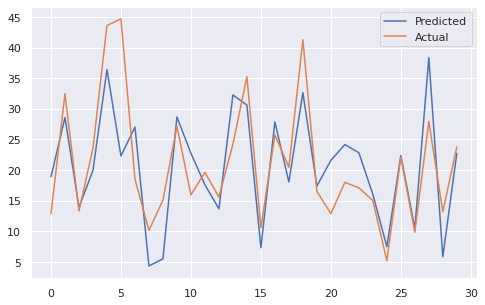

In [103]:
#visualzing the predicted and actual values
plt.figure(figsize=(8,5))
plt.plot(ridgegrid.predict(x_test[:30]))
plt.plot((np.array(y_test[:30])))
plt.legend(["Predicted","Actual"])
plt.show()

For elasticnet regression the alpha value is set to 0.7 and l1_ratio is 0.01 and the r2 score for the train data is 0.63 andt the test data is 0.63 and 0.6.

In gridsearchcv the best fit alpha is 0.01 and l1_ratio is 1. The r2 score fot the train data is 0.64 and the test data is 0.61.
Mean Squared Error for the Train data is 54.19 and Test data is 50.86.
The Root Mean Squared Error for the Train data is 7.36 and Test data is 7.13
The Mean absolute error for the Train data is 5.64 and Test data is 5.53. Mean Absolute Percentage error for the Train data is 34.47% and Test data is 32.5%



### **ML Model - 5 Decision tree**

In [104]:
# ML Model - 3 Implementation
decision_tree=DecisionTreeRegressor().fit(x_train,y_train)

# Predict on the model
decision_tree.predict(x_train)

array([20.39607805, 32.96968304, 12.80624847, ..., 35.67912555,
        2.82842712, 27.14774392])

In [105]:
#coefficients of decision tree
decision_tree.feature_importances_

array([1.29574080e-01, 5.47379044e-03, 2.46603707e-02, 1.61288608e-02,
       1.09647600e-02, 1.90859394e-04, 3.15936732e-01, 4.29453282e-02,
       7.00416656e-03, 2.25709327e-03, 1.00564340e-02, 5.13414416e-02,
       3.61069607e-01, 2.23964749e-02])

In [106]:
decision_tree.score(x_test,y_test)

0.8797910569003662

In [107]:
decision_tree.get_n_leaves()

6710

In [108]:
#Errors for train data in decisiontree Regression
error(y_test,decision_tree.predict(x_test),'Test')

R2_ score Test data = 0.88
Mean Squared Error for the Test data = 17.22
Root Mean Squared Error for the Test data = 4.15
Mean Absolute Error for the Test data = 2.56
Mean Absolute Percentage error for the Test data = 14.08%


In [109]:
#Errors for train data in lasso Regression
error(y_train,decision_tree.predict(x_train),'Train')

R2_ score Train data = 1.0
Mean Squared Error for the Train data = 0.0
Root Mean Squared Error for the Train data = 0.0
Mean Absolute Error for the Train data = 0.0
Mean Absolute Percentage error for the Train data = 0.0%


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [110]:
# Visualizing evaluation Metric Score chart
# updating the evaluation chart
Evaluation_chart.loc['Decison tree']=({'R2':round(r2_score(y_test,decision_tree.predict(x_test)),2),'MSE':round(mean_squared_error(y_test,decision_tree.predict(x_test)),2),'RMSE':round(np.sqrt(mean_squared_error(y_test,decision_tree.predict(x_test))),2),'MAE':round(mean_absolute_error(y_test,decision_tree.predict(x_test)),2),'MAPE':round(mean_absolute_percentage_error(y_test,decision_tree.predict(x_test)),4)*100})
Evaluation_chart

R2    MSE  RMSE   MAE   MAPE
Linear           0.64  50.86  7.13  5.53  32.50
Lasso            0.63  52.81  7.27  5.62  33.63
LassoGrid        0.64  50.86  7.13  5.53  32.50
Ridge            0.64  50.86  7.13  5.53  32.50
RidgeGrid        0.64  50.86  7.13  5.53  32.50
ElasticNet       0.56  62.94  7.93  6.20  38.01
ElasticNet Grid  0.64  50.86  7.13  5.53  32.50
Decison tree     0.88  17.22  4.15  2.56  14.08

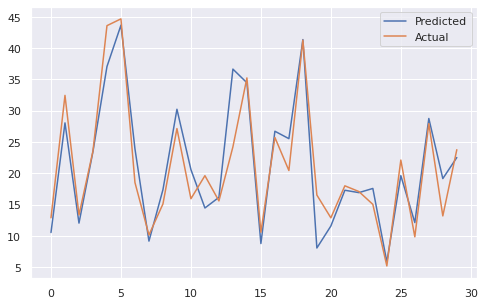

In [111]:
#visualzing the predicted and actual values
plt.figure(figsize=(8,5))
plt.plot(decision_tree.predict(x_test[:30]))
plt.plot((np.array(y_test[:30])))
plt.legend(["Predicted","Actual"])
plt.show()

A Decision Tree Regressor is a regression technique built on a tree-based structure. A decision tree regressor is a high variance model which tries to learn all the data points in the train set. In our bike share prediction dataset, the r2 score for the train data is 1, and the r2 error for test data is 0.88

### **ML Model - 6 Random Forest**

In [112]:
# ML Model - 3 Implementation
rfr=RandomForestRegressor(max_depth=70,oob_score=True,random_state=5).fit(x_train,y_train)

# Predict on the model
rfr.predict(x_train)

array([19.67506632, 32.93302177, 11.67700519, ..., 35.03286774,
        6.6496691 , 27.79192754])

In [113]:
#coefficients of random forest
rfr.feature_importances_

array([7.11930416e-02, 5.74142372e-03, 2.42838607e-02, 1.51724751e-02,
       1.08755870e-02, 2.69696982e-04, 2.98890843e-01, 4.61681446e-02,
       7.37138444e-03, 1.69974444e-03, 1.04301384e-02, 1.17875065e-01,
       3.61690663e-01, 2.83379323e-02])

In [114]:
# out of box score
rfr.oob_score_

0.9328772510370155

In [115]:
#Parameters of random forest
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 70,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 5,
 'verbose': 0,
 'warm_start': False}

In [116]:
# looking into the test prediction score
rfr.score(x_test,y_test)

0.9399876599858789

In [117]:
#Errors for test data in random forest Regression
error(y_test,rfr.predict(x_test),'Test')

R2_ score Test data = 0.94
Mean Squared Error for the Test data = 8.6
Root Mean Squared Error for the Test data = 2.93
Mean Absolute Error for the Test data = 1.88
Mean Absolute Percentage error for the Test data = 10.81%


In [118]:
#Errors for train data in random forest Regression
error(y_train,rfr.predict(x_train),'Train')

R2_ score Train data = 0.99
Mean Squared Error for the Train data = 1.28
Root Mean Squared Error for the Train data = 1.13
Mean Absolute Error for the Train data = 0.72
Mean Absolute Percentage error for the Train data = 4.53%


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [119]:
# Visualizing evaluation Metric Score chart
# updating the evaluation chart
Evaluation_chart.loc['Random Forest']=({'R2':round(r2_score(y_test,rfr.predict(x_test)),2),'MSE':round(mean_squared_error(y_test,rfr.predict(x_test)),2),'RMSE':round(np.sqrt(mean_squared_error(y_test,rfr.predict(x_test))),2),'MAE':round(mean_absolute_error(y_test,rfr.predict(x_test)),2),'MAPE':round(mean_absolute_percentage_error(y_test,rfr.predict(x_test)),4)*100})
Evaluation_chart

R2    MSE  RMSE   MAE   MAPE
Linear           0.64  50.86  7.13  5.53  32.50
Lasso            0.63  52.81  7.27  5.62  33.63
LassoGrid        0.64  50.86  7.13  5.53  32.50
Ridge            0.64  50.86  7.13  5.53  32.50
RidgeGrid        0.64  50.86  7.13  5.53  32.50
ElasticNet       0.56  62.94  7.93  6.20  38.01
ElasticNet Grid  0.64  50.86  7.13  5.53  32.50
Decison tree     0.88  17.22  4.15  2.56  14.08
Random Forest    0.94   8.60  2.93  1.88  10.81

#### 2. Cross- Validation & Hyperparameter Tuning

In [120]:
#cross validation implemantation
rfcv=GridSearchCV(estimator=RandomForestRegressor(),param_grid={'n_estimators':[100,300,500],'max_depth':[50,80,100,150]},cv=3,n_jobs=-1)
rfcv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [50, 80, 100, 150],
                         'n_estimators': [100, 300, 500]})

In [121]:
# Best params from the grid search cv
rfcv.best_params_

{'max_depth': 100, 'n_estimators': 500}

In [122]:
#predicting the test data
rfcv.predict(x_test)

array([11.79212727, 31.98829723, 13.46407913, ..., 13.51104167,
       10.51266262, 29.33828396])

In [123]:
# score  for the prediction
rfcv.score(x_test,y_test)

0.9397657341496783

In [124]:
#Errors for test data in random forest Regression CV
error(y_test,rfcv.predict(x_test),'Test')

R2_ score Test data = 0.94
Mean Squared Error for the Test data = 8.63
Root Mean Squared Error for the Test data = 2.94
Mean Absolute Error for the Test data = 1.87
Mean Absolute Percentage error for the Test data = 10.72%


In [125]:
#Errors for train data in random forest Regression CV
error(y_train,rfcv.predict(x_train),'Train')

R2_ score Train data = 0.99
Mean Squared Error for the Train data = 1.23
Root Mean Squared Error for the Train data = 1.11
Mean Absolute Error for the Train data = 0.71
Mean Absolute Percentage error for the Train data = 4.45%


In [126]:
# Visualizing evaluation Metric Score chart
# updating the evaluation chart
Evaluation_chart.loc['Random Forest CV']=({'R2':round(r2_score(y_test,rfcv.predict(x_test)),2),'MSE':round(mean_squared_error(y_test,rfcv.predict(x_test)),2),'RMSE':round(np.sqrt(mean_squared_error(y_test,rfcv.predict(x_test))),2),'MAE':round(mean_absolute_error(y_test,rfcv.predict(x_test)),2),'MAPE':round(mean_absolute_percentage_error(y_test,rfcv.predict(x_test)),4)*100})
Evaluation_chart

R2    MSE  RMSE   MAE   MAPE
Linear            0.64  50.86  7.13  5.53  32.50
Lasso             0.63  52.81  7.27  5.62  33.63
LassoGrid         0.64  50.86  7.13  5.53  32.50
Ridge             0.64  50.86  7.13  5.53  32.50
RidgeGrid         0.64  50.86  7.13  5.53  32.50
ElasticNet        0.56  62.94  7.93  6.20  38.01
ElasticNet Grid   0.64  50.86  7.13  5.53  32.50
Decison tree      0.88  17.22  4.15  2.56  14.08
Random Forest     0.94   8.60  2.93  1.88  10.81
Random Forest CV  0.94   8.63  2.94  1.87  10.72

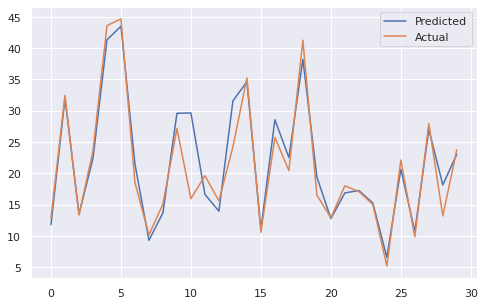

In [127]:
#visualzing the predicted and actual values
plt.figure(figsize=(8,5))
plt.plot(rfcv.predict(x_test[:30]))
plt.plot((np.array(y_test[:30])))
plt.legend(["Predicted","Actual"])
plt.show()

There are different ensemble models in machine learning. The bagging technique is one such model, where the Random Forest algorithm is one of the popular machine learning models. In Random Forest Regressor, a random selection of samples with replacement from the dataset is used to predict the dependent variable. The number of observations and features selected is less than the number of rows and features in the dataset. Because of the lesser feature selection, every feature in the dataset gets a chance to split in the tree.

The r2 error in random forest regressor is 0.99 for train data and 0.94 for the test data. After the hyper parameter tuning and cross validation we get the same results.


### **ML Model - 7 Gradeint Booosting**

In [128]:
# ML Model - 3 Implementation
gbm=GradientBoostingRegressor(learning_rate=0.2,subsample=0.9).fit(x_train,y_train)

# Predict on the model
gbm.predict(x_train)

array([18.01012714, 32.59484668, 13.45920734, ..., 33.57558765,
       12.27987704, 26.58295097])

In [129]:
#coefficients of Gradient boosting
gbm.feature_importances_

array([0.07253361, 0.0039919 , 0.0236829 , 0.02036927, 0.00148325,
       0.        , 0.30530073, 0.05478449, 0.00150865, 0.00157745,
       0.00249984, 0.11988606, 0.3559926 , 0.03638923])

In [130]:
# looking into the test prediction score
gbm.score(x_test,y_test)

0.9232773684849678

In [131]:
# lets look at the out of bag imrovement
gbm.oob_improvement_

array([ 3.22858938e+01,  2.23431836e+01,  1.55249124e+01,  1.08774229e+01,
        7.44117861e+00,  4.68628820e+00,  4.87661876e+00,  3.13958023e+00,
        2.83754410e+00,  1.59657552e+00,  1.25619710e+00,  2.00244087e+00,
        1.31734960e+00,  4.37309379e-01,  7.66785764e-01,  8.36250023e-01,
        8.16904236e-01,  5.43946185e-01,  3.50035709e-01,  8.20775784e-01,
        2.95145249e-01,  1.88237044e-01,  1.83129908e-01,  2.18474812e-01,
        1.52620498e-01,  2.82513031e-02,  2.61798943e-01,  2.55297075e-01,
        1.67655884e-01,  2.17848228e-01,  1.27287502e-01,  5.95487560e-02,
        1.03944773e-01,  1.47273096e-01,  9.28751354e-02, -3.89635081e-02,
        8.14705650e-01,  5.27468262e-02, -1.14279403e-02,  1.62898342e-02,
        5.56727073e-01,  1.72615428e-02,  9.66391965e-02, -5.59829883e-04,
        1.23445308e-01,  3.99655228e-01,  5.72730859e-05,  2.98066037e-01,
        8.63905503e-02,  1.61233228e-01,  3.15389436e-01,  5.72379503e-02,
        6.54107587e-02,  

In [132]:
#Errors for train data in Gradient Boosting Regression
error(y_test,gbm.predict(x_test),'Test')

R2_ score Test data = 0.92
Mean Squared Error for the Test data = 10.99
Root Mean Squared Error for the Test data = 3.32
Mean Absolute Error for the Test data = 2.3
Mean Absolute Percentage error for the Test data = 13.29%


In [133]:
#Errors for train data in Gradient Boosting Regression
error(y_train,gbm.predict(x_train),'Train')

R2_ score Train data = 0.93
Mean Squared Error for the Train data = 9.6
Root Mean Squared Error for the Train data = 3.1
Mean Absolute Error for the Train data = 2.15
Mean Absolute Percentage error for the Train data = 12.64%


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [134]:
# Visualizing evaluation Metric Score chart
# updating the evaluation chart
Evaluation_chart.loc['Gradient Boosting']=({'R2':round(r2_score(y_test,gbm.predict(x_test)),2),'MSE':round(mean_squared_error(y_test,gbm.predict(x_test)),2),'RMSE':round(np.sqrt(mean_squared_error(y_test,gbm.predict(x_test))),2),'MAE':round(mean_absolute_error(y_test,gbm.predict(x_test)),2),'MAPE':round(mean_absolute_percentage_error(y_test,gbm.predict(x_test)),4)*100})
Evaluation_chart

R2    MSE  RMSE   MAE   MAPE
Linear             0.64  50.86  7.13  5.53  32.50
Lasso              0.63  52.81  7.27  5.62  33.63
LassoGrid          0.64  50.86  7.13  5.53  32.50
Ridge              0.64  50.86  7.13  5.53  32.50
RidgeGrid          0.64  50.86  7.13  5.53  32.50
ElasticNet         0.56  62.94  7.93  6.20  38.01
ElasticNet Grid    0.64  50.86  7.13  5.53  32.50
Decison tree       0.88  17.22  4.15  2.56  14.08
Random Forest      0.94   8.60  2.93  1.88  10.81
Random Forest CV   0.94   8.63  2.94  1.87  10.72
Gradient Boosting  0.92  10.99  3.32  2.30  13.29

#### 2. Cross- Validation & Hyperparameter Tuning

In [135]:
#cross validation implemantation
gbrcv=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid={'n_estimators':[100,300,500],'max_depth':[2,3,4,5],'subsample':[0.2,0.4,0.8,0.9],'learning_rate':[0.2,0.4,0.6,0.9]},cv=3,n_jobs=-1)
gbrcv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.4, 0.6, 0.9],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.2, 0.4, 0.8, 0.9]})

In [136]:
# Best params from the grid search cv
gbrcv.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}

In [137]:
#predicting the test data
gbrcv.predict(x_test)

array([12.41169143, 32.32301748, 16.12589066, ..., 13.09824127,
        7.76431513, 24.37711608])

In [138]:
# score  for the prediction
gbrcv.score(x_test,y_test)

0.9425034772078574

In [139]:
#Errors for test data in Gradient Boosting CV Regression
error(y_test,gbrcv.predict(x_test),'Test')

R2_ score Test data = 0.94
Mean Squared Error for the Test data = 8.24
Root Mean Squared Error for the Test data = 2.87
Mean Absolute Error for the Test data = 1.8
Mean Absolute Percentage error for the Test data = 10.18%


In [141]:
#Errors for train data in Gradient Boosting CV Regression
error(y_train,gbrcv.predict(x_train),'Train')

R2_ score Train data = 1.0
Mean Squared Error for the Train data = 0.44
Root Mean Squared Error for the Train data = 0.66
Mean Absolute Error for the Train data = 0.5
Mean Absolute Percentage error for the Train data = 2.73%


In [142]:
# Visualizing evaluation Metric Score chart
# updating the evaluation chart
Evaluation_chart.loc['Gradient Boosting CV']=({'R2':round(r2_score(y_test,gbrcv.predict(x_test)),2),'MSE':round(mean_squared_error(y_test,gbrcv.predict(x_test)),2),'RMSE':round(np.sqrt(mean_squared_error(y_test,gbrcv.predict(x_test))),2),'MAE':round(mean_absolute_error(y_test,gbrcv.predict(x_test)),2),'MAPE':round(mean_absolute_percentage_error(y_test,gbrcv.predict(x_test)),4)*100})
Evaluation_chart

R2    MSE  RMSE   MAE   MAPE
Linear                0.64  50.86  7.13  5.53  32.50
Lasso                 0.63  52.81  7.27  5.62  33.63
LassoGrid             0.64  50.86  7.13  5.53  32.50
Ridge                 0.64  50.86  7.13  5.53  32.50
RidgeGrid             0.64  50.86  7.13  5.53  32.50
ElasticNet            0.56  62.94  7.93  6.20  38.01
ElasticNet Grid       0.64  50.86  7.13  5.53  32.50
Decison tree          0.88  17.22  4.15  2.56  14.08
Random Forest         0.94   8.60  2.93  1.88  10.81
Random Forest CV      0.94   8.63  2.94  1.87  10.72
Gradient Boosting     0.92  10.99  3.32  2.30  13.29
Gradient Boosting CV  0.94   8.24  2.87  1.80  10.18

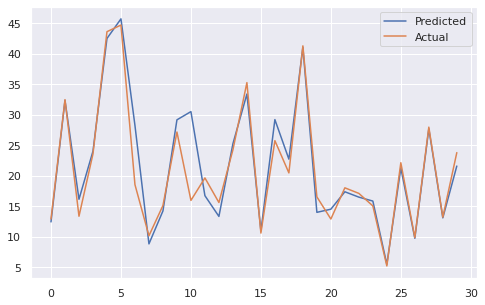

In [143]:
#visualzing the predicted and actual values
plt.figure(figsize=(8,5))
plt.plot(gbrcv.predict(x_test[:30]))
plt.plot((np.array(y_test[:30])))
plt.legend(["Predicted","Actual"])
plt.show()

Gradient boosting is one of the boosting techniques in ensemble models and is said to be a sequential model because the current tree's output determines the input of the next tree.  The weights applied to the succeeding trees are based on the errors in the present tree.  Every tree learns from the weak learners or the mistakes of the previous tree. 

The r2 score for the gradient boosting model for the training dataset is 0.93 and the test data set is 0.92.

After cross validation and hyper parameter tuning the r2 score for thr training dataset is  and the test dataset is 0.94

### **ML Model - 7 XGboost**

In [144]:
# ML Model - 3 Implementation
xg=XGBRegressor(objective='reg:squarederror',subsample=0.6,colsample_bytree=0.8).fit(x_train,y_train)

# Predict on the model
xg.predict(x_train)

array([16.57765 , 33.0579  , 11.874327, ..., 34.98774 , 12.807961,
       28.146008], dtype=float32)

In [145]:
xg.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.8,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:squarederror',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.6,
 'verbosity': 1}

In [146]:
#coefficients of XGBoost
xg.feature_importances_

array([0.12517756, 0.01084276, 0.02955943, 0.02899601, 0.0037332 ,
       0.01501606, 0.08515937, 0.38288078, 0.0034702 , 0.00537155,
       0.00630058, 0.11081933, 0.14682564, 0.04584754], dtype=float32)

In [147]:
# looking into the test prediction score
xg.score(x_test,y_test)

0.9017563355030648

In [148]:
#Errors for train data in XGBoost Regression
error(y_test,xg.predict(x_test),'Test')

R2_ score Test data = 0.9
Mean Squared Error for the Test data = 14.07
Root Mean Squared Error for the Test data = 3.75
Mean Absolute Error for the Test data = 2.69
Mean Absolute Percentage error for the Test data = 15.129999999999999%


In [149]:
#Errors for train data in XGBoost Regression
error(y_train,xg.predict(x_train),'Train')

R2_ score Train data = 0.91
Mean Squared Error for the Train data = 13.13
Root Mean Squared Error for the Train data = 3.62
Mean Absolute Error for the Train data = 2.58
Mean Absolute Percentage error for the Train data = 14.85%


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [150]:
# Visualizing evaluation Metric Score chart
# updating the evaluation chart
Evaluation_chart.loc['XGBoost']=({'R2':round(r2_score(y_test,xg.predict(x_test)),2),'MSE':round(mean_squared_error(y_test,xg.predict(x_test)),2),'RMSE':round(np.sqrt(mean_squared_error(y_test,xg.predict(x_test))),2),'MAE':round(mean_absolute_error(y_test,xg.predict(x_test)),2),'MAPE':round(mean_absolute_percentage_error(y_test,xg.predict(x_test)),4)*100})
Evaluation_chart

R2    MSE  RMSE   MAE   MAPE
Linear                0.64  50.86  7.13  5.53  32.50
Lasso                 0.63  52.81  7.27  5.62  33.63
LassoGrid             0.64  50.86  7.13  5.53  32.50
Ridge                 0.64  50.86  7.13  5.53  32.50
RidgeGrid             0.64  50.86  7.13  5.53  32.50
ElasticNet            0.56  62.94  7.93  6.20  38.01
ElasticNet Grid       0.64  50.86  7.13  5.53  32.50
Decison tree          0.88  17.22  4.15  2.56  14.08
Random Forest         0.94   8.60  2.93  1.88  10.81
Random Forest CV      0.94   8.63  2.94  1.87  10.72
Gradient Boosting     0.92  10.99  3.32  2.30  13.29
Gradient Boosting CV  0.94   8.24  2.87  1.80  10.18
XGBoost               0.90  14.07  3.75  2.69  15.13

#### 2. Cross- Validation & Hyperparameter Tuning

In [151]:
#cross validation implemantation
xgcv=GridSearchCV(estimator=XGBRegressor(),param_grid={'objective':['reg:squarederror'],'reg_alpha':[0.1,0.01,0.2,0.3],'reg_lambda':[0.1,0.2,0.3,0.4,0.5],'gamma':[0.1,0.2,0.5,0.9],'subsample': [0.5,0.7,0.9],'colsample_bytree': [0.7,0.8,0.9],},cv=3,n_jobs=-1)
xgcv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.5, 0.9],
                         'objective': ['reg:squarederror'],
                         'reg_alpha': [0.1, 0.01, 0.2, 0.3],
                         'reg_lambda': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'subsample': [0.5, 0.7, 0.9]})

In [152]:
# Best params from the grid search cv
xgcv.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'objective': 'reg:squarederror',
 'reg_alpha': 0.3,
 'reg_lambda': 0.2,
 'subsample': 0.5}

In [153]:
#predicting the test data
xgcv.predict(x_test)

array([13.647832 , 32.339245 , 12.2202425, ..., 15.555021 , 10.269741 ,
       30.576487 ], dtype=float32)

In [154]:
# score  for the prediction
xgcv.score(x_test,y_test)

0.9048559915733712

In [155]:
# Visualizing evaluation Metric Score chart
# updating the evaluation chart
Evaluation_chart.loc['XGBoost CV']=({'R2':round(r2_score(y_test,xgcv.predict(x_test)),2),'MSE':round(mean_squared_error(y_test,xgcv.predict(x_test)),2),'RMSE':round(np.sqrt(mean_squared_error(y_test,xgcv.predict(x_test))),2),'MAE':round(mean_absolute_error(y_test,xgcv.predict(x_test)),2),'MAPE':round(mean_absolute_percentage_error(y_test,xgcv.predict(x_test)),4)*100})
Evaluation_chart

R2    MSE  RMSE   MAE   MAPE
Linear                0.64  50.86  7.13  5.53  32.50
Lasso                 0.63  52.81  7.27  5.62  33.63
LassoGrid             0.64  50.86  7.13  5.53  32.50
Ridge                 0.64  50.86  7.13  5.53  32.50
RidgeGrid             0.64  50.86  7.13  5.53  32.50
ElasticNet            0.56  62.94  7.93  6.20  38.01
ElasticNet Grid       0.64  50.86  7.13  5.53  32.50
Decison tree          0.88  17.22  4.15  2.56  14.08
Random Forest         0.94   8.60  2.93  1.88  10.81
Random Forest CV      0.94   8.63  2.94  1.87  10.72
Gradient Boosting     0.92  10.99  3.32  2.30  13.29
Gradient Boosting CV  0.94   8.24  2.87  1.80  10.18
XGBoost               0.90  14.07  3.75  2.69  15.13
XGBoost CV            0.90  13.63  3.69  2.62  14.63

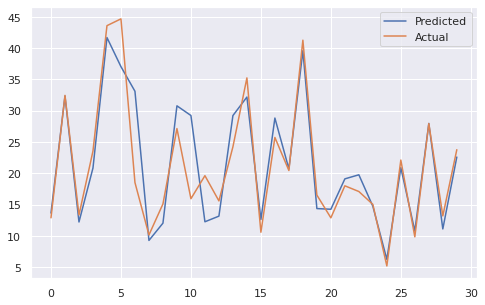

In [156]:
#visualzing the predicted and actual values
plt.figure(figsize=(8,5))
plt.plot(xgcv.predict(x_test[:30]))
plt.plot((np.array(y_test[:30])))
plt.legend(["Predicted","Actual"])
plt.show()

XGBoost regressor is boosting technique in the ensemble models. It is an advancement from the gradient boosting model, where the computation is quick, and regularization is done within the algorithms to have a good bias-variance tradeoff. With different hyperparameter tuning, we have an r2 error of 0.90, comparatively less than the gradient boosting technique.


## **Model comparision**

In [157]:
Evaluation_chart.sort_values(by='R2',ascending=False)

R2    MSE  RMSE   MAE   MAPE
Random Forest         0.94   8.60  2.93  1.88  10.81
Random Forest CV      0.94   8.63  2.94  1.87  10.72
Gradient Boosting CV  0.94   8.24  2.87  1.80  10.18
Gradient Boosting     0.92  10.99  3.32  2.30  13.29
XGBoost               0.90  14.07  3.75  2.69  15.13
XGBoost CV            0.90  13.63  3.69  2.62  14.63
Decison tree          0.88  17.22  4.15  2.56  14.08
Linear                0.64  50.86  7.13  5.53  32.50
LassoGrid             0.64  50.86  7.13  5.53  32.50
Ridge                 0.64  50.86  7.13  5.53  32.50
RidgeGrid             0.64  50.86  7.13  5.53  32.50
ElasticNet Grid       0.64  50.86  7.13  5.53  32.50
Lasso                 0.63  52.81  7.27  5.62  33.63
ElasticNet            0.56  62.94  7.93  6.20  38.01

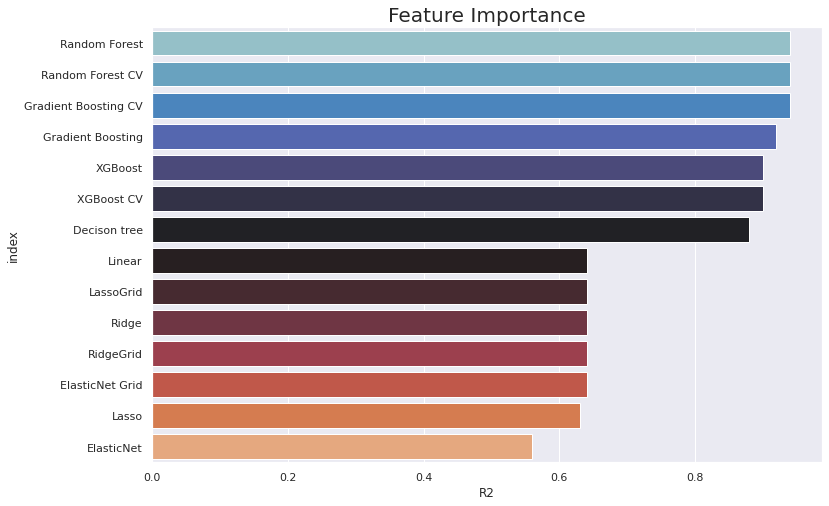

In [158]:
#Visualizing the r2 error
sns.set(rc={"figure.figsize":(12,8)})
r2=sns.barplot(data=Evaluation_chart.reset_index().sort_values(by='R2',ascending=False),y='index',x='R2',palette='icefire')
r2.set_title('Feature Importance',fontsize=20)
plt.show()

From tha above graph it is clear that the r2 score for Gradient boosting and Random forest is higher than other machine learning models. 
Gradient Boosting have an r2 score of 0.95 for the training datset and the random forest have an r2 score of 0.94.

## **Feature Importance**

In [159]:
#Creating a Data Frame for Feature importance
Feature_data=pd.DataFrame({'Features':independent_variables,'feature_importance':gbm.feature_importances_})

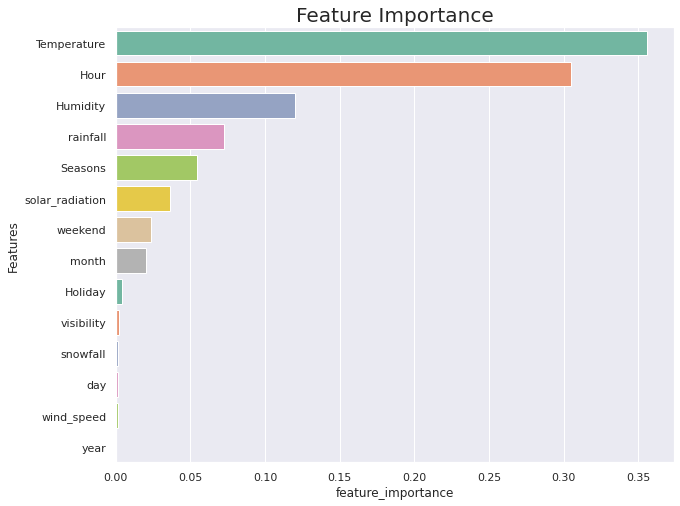

In [160]:
#Visualizing the feature importance
sns.set(rc={"figure.figsize":(10,8)})
sns.barplot(data=Feature_data.sort_values(by='feature_importance',ascending=False),x='feature_importance',y='Features',palette='Set2')
plt.title('Feature Importance',fontsize=20)
plt.show()

The features that contribute more to the No of bikes rented are
* Temperature
* Hour
* Humidity
* Rainfall
* Seasons
* Month
* Weekend

The other features such as holiday, visibility, snowfall, windspeed, day and year doesnot contribute much to the dependent variable

## **Model Explainability**

In [161]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 23.1 MB/s eta 0:00:00


In [162]:
import shap

In [163]:
# Generating the shap data
shap_data=shap.TreeExplainer(rfr).shap_values(x_test)

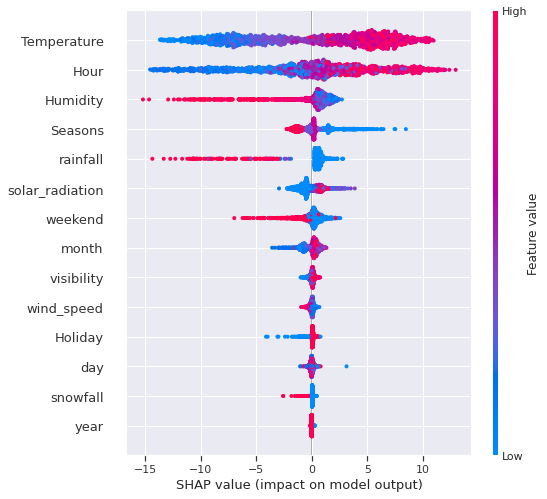

In [164]:
# Creating a summary plot
shap.summary_plot(shap_data,feature_names=independent_variables,features=x_test)

From the above shapley results, it is clear that
* Temperature is the top most feature that contributes more to the prediction, as the temperature is high the dendent variable is also increasing
* Hour is also an important featur in predicting the number of bikes rented. The highet the value the higher the prediction values.
* The humidty is inversely propotional, because the lowe the humidity the higher the number of rental bikes.
* Rainfall, solar radiation,weekend and month are moderately contributing towards the dependent variable.
* The feature such as year, snowfall, day, holiday, windspeed, Visibility doesn't really contribute much to the prediction

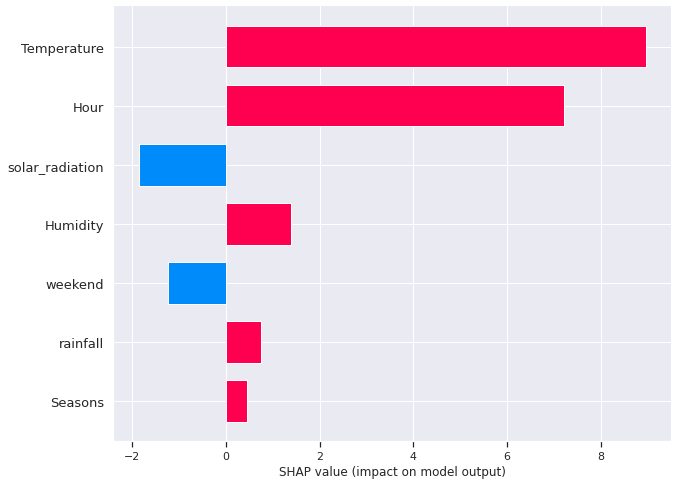

In [165]:
# plotting for a single test variable in the test data
shap.bar_plot(shap_data[250],feature_names=independent_variables,max_display=7,show=True)

The above prediciton is for a particular test data, where we can clearly see features such as temperature, hour, humidity, rainfall and season positively impact the dependent variable ant the features such as solar radiation and weekend is negatively contributing towards the dataset.

# **Conclusion**

We started doing missing value detection, null values treatment, and EDA. We identified the dependent and independent variables in the dataset. The multicollinearity of the independent variables is resolved using the Variance inflation factor. The train and test variables are defined and scaled using standard scalar. 

The prominent features for bike rental bookings are the time of the day and temperature for the linear model. The bookings are high from 7 AM to 9 AM and from 5 PM to 8 PM. The rain fall and humidity have a negative impact over the renatal bike bookings.

Features such as windspeed, day, visibility, snowfall and year doesnt actual have an impact over the prediction.

We have implemented different regression models to predict the bike rental. We have implemented different regression models, Such as 
* Linear Regression
* Lasso Regression
* Ridge Regression
* Elastic Net Regression
* Decision Tree Regressor
* Random Forest Regressor
* Gradient Boost Regressor
* XGBoost Regressor

The best performing model for bike demand prediction is Random froest and gradiend boosting which gives an approximate r2 erroe as 0.94.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***